In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import seaborn as sb
from sklearn import metrics
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare

In [2]:
# reading csv file
original= pd.read_csv('master.csv')

# creating copy of original file. I will be making all the changes and analysis in copied file only
masterdata= original.copy()

#printing first 5 rows of dataset
print(masterdata.head(5))

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country_year  HDI_for_year gdp_for_year ($)   \
0               6.71  Albania1987           NaN     2,156,624,900   
1               5.19  Albania1987           NaN     2,156,624,900   
2               4.83  Albania1987           NaN     2,156,624,900   
3               4.59  Albania1987           NaN     2,156,624,900   
4               3.28  Albania1987           NaN     2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G

In [3]:
# the shape of master dataset
print(np.shape(masterdata))

(27820, 12)


In [4]:
# printing information/details about the dataset
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country_year          27820 non-null object
HDI_for_year          8364 non-null float64
gdp_for_year ($)      27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1.9+ MB


### HDI_for_year column has the null value. Almost 70% of HDI_for_year is missing in the data set. So , I am dropping this column.

In [5]:
masterdata = masterdata.drop(['HDI_for_year'], axis=1)
masterdata.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country_year          0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [6]:
# printing the number of unique year and year value
year = np.unique(masterdata.year)
print('number of unique year', np.size(year))
print(year)

number of unique year 32
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016]


In [7]:
# printing number of unique country
country_list = np.unique(masterdata.country)
np.size(country_list)

101

In [8]:
# printing number of unique age
np.unique(masterdata.age)

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [9]:
# printing number of unique gender
np.unique(masterdata.sex)

array(['female', 'male'], dtype=object)

In [10]:
# we have two gender and 6 age group so for each individual year all the country should have two rows
# checking whether all the country have 12 rows of data of not and printing value with less than 12 rows. 
groupeddata=masterdata.groupby('country_year')
value = groupeddata.size()
for n, s in value.iteritems():
    if s < 12:
        print(n,s)

Armenia2016 10
Austria2016 10
Croatia2016 10
Cyprus2016 10
Czech Republic2016 10
Grenada2016 10
Hungary2016 10
Iceland2016 10
Lithuania2016 10
Mauritius2016 10
Mongolia2016 10
Netherlands2016 10
Qatar2016 10
Romania2016 10
Sweden2016 10
Thailand2016 10


##### In list we can see that all the country have 10 rows in 2016 only. It seems something is wrong with 2016

In [11]:
# printing the country column for year 2016 
countrylist_2016 = masterdata[masterdata.year == 2016].groupby('country')
countrylist_2016.size()

country
Armenia           10
Austria           10
Croatia           10
Cyprus            10
Czech Republic    10
Grenada           10
Hungary           10
Iceland           10
Lithuania         10
Mauritius         10
Mongolia          10
Netherlands       10
Qatar             10
Romania           10
Sweden            10
Thailand          10
dtype: int64

In [12]:
## Only few country have data for 2016 and more than 50% of data are missing so we will remove 2016 year data
masterdata = masterdata[masterdata.year != 2016]
np.shape(masterdata)

(27660, 11)

In [13]:
# method to get unique value of the data in data set
def uniquevalue(datalist):
    x = np.array(datalist)
    data_list= np.unique(x)
    return data_list

In [14]:
year=masterdata.year
country = masterdata.country

# calling uniquevalue method to get unique country
UniqueCountry=uniquevalue(country)

## reassigning country and year value
country_list = np.unique(masterdata.country)
year = np.unique(masterdata.year)

##### After deleting 2016, we have 31 years of information. There are countries with less than 10 years of information  so I am deleting the countries with less than 10 years of data

In [15]:
# defining methos to get country to be dropped
def getCountryToDelete(mainData):
    countryToDrop=[]
    groupbycountry= mainData.groupby('country')
    groupbycountry.size()
    for countries, count in groupbycountry.size().iteritems():
        if count/12 <10:
            countryToDrop.append(countries)
    return countryToDrop

In [16]:
country_to_drop =getCountryToDelete(masterdata)
country_to_drop

['Bosnia and Herzegovina',
 'Cabo Verde',
 'Dominica',
 'Macau',
 'Nicaragua',
 'Oman',
 'Saint Kitts and Nevis',
 'San Marino',
 'Turkey',
 'United Arab Emirates']

In [17]:
## keeping the countries with more than 10 years of information
for c in country_to_drop:
    masterdata = masterdata[masterdata.country != c]

country_list = np.unique(masterdata.country)
year_list = np.unique(masterdata.year)
np.size(country_list)

90

##### Now, there is only 90 countries in the dataframe.

In [18]:
# to check whether the countries has been deleted or not
np.shape(masterdata)

(27264, 11)

In [19]:
#assigning unique country value
UniqueCountry = uniquevalue(masterdata.country)
np.shape(UniqueCountry)

(90,)

In [20]:
#renaming columns
masterdata=masterdata.rename(columns={'suicides/100k pop':'suicideper100k','gdp_for_year ($) ':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'})

In [21]:
#printing general statistics
print(masterdata.describe())

               year   suicides_no    population  suicideper100k  \
count  27264.000000  27264.000000  2.726400e+04    27264.000000   
mean    2001.089349    246.465192  1.856727e+06       12.948982   
std        8.395766    910.639843  3.936707e+06       19.056094   
min     1985.000000      0.000000  2.780000e+02        0.000000   
25%     1994.000000      3.000000  9.860150e+04        0.950000   
50%     2001.000000     25.000000  4.329325e+05        6.100000   
75%     2008.000000    134.000000  1.496739e+06       16.840000   
max     2015.000000  22338.000000  4.380521e+07      224.970000   

       gdp_per_capita  
count    27264.000000  
mean     16785.284771  
std      18869.866389  
min        251.000000  
25%       3432.250000  
50%       9157.000000  
75%      24754.000000  
max     126352.000000  


#### In the suicide_number column we can see that the 75% of data have suicide rate less tha 134 but the maximum value is 22338. In gdp_per_capita also, 75% of data have the value less than 42870 but the max value is 126352. The difference between max value and the 75% value is veru high. 

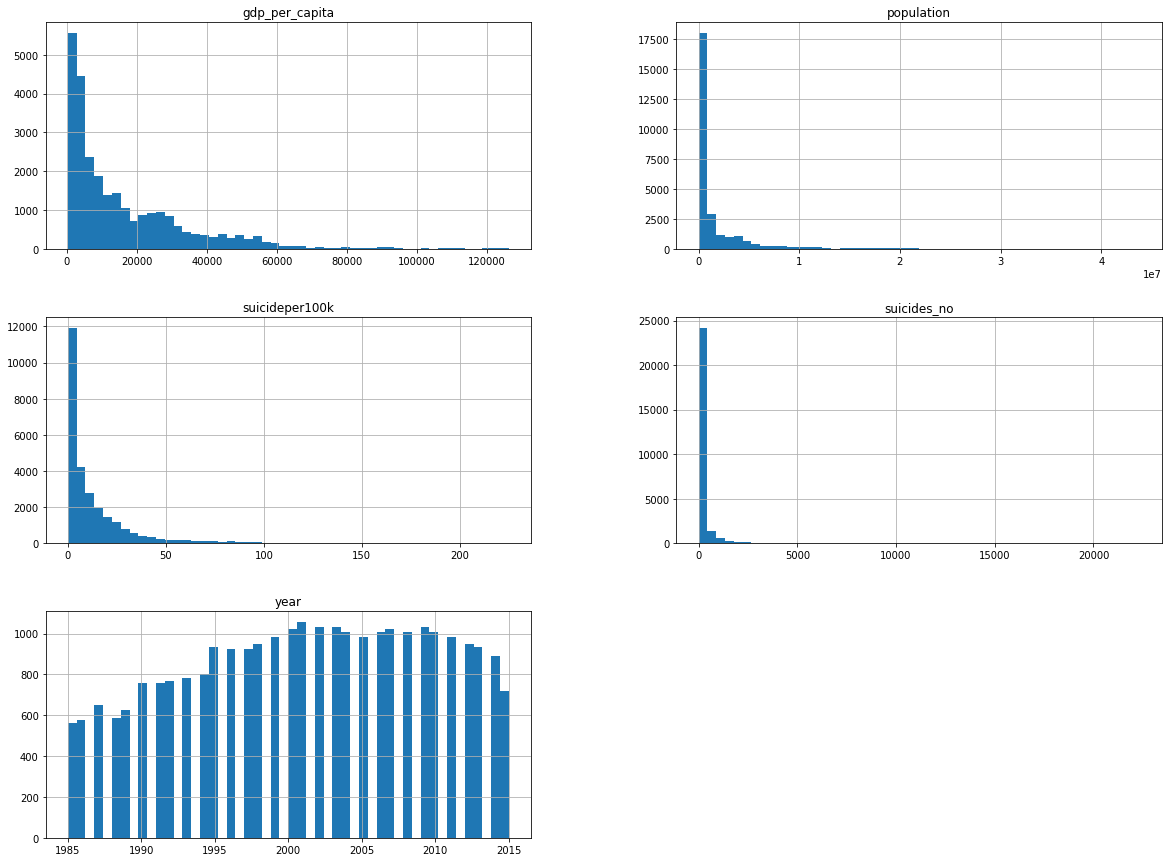

In [22]:
#histogram for each numeric data in masterdata set
masterdata.hist(bins=50, figsize=(20, 15))
plt.show()

In [23]:
#creating array for each column
population=np.array(masterdata.population)
sucicidesper100K=masterdata['suicideper100k']

#removing commas
masterdata['gdp_for_year'] = masterdata['gdp_for_year'].str.replace(',', '')
gdpForYear=masterdata['gdp_for_year']
gdpForYear=gdpForYear.astype(float)

gdpPerCapita=np.array(masterdata.gdp_per_capita)
generation=np.array(masterdata.generation)
uniqueyear= np.array(uniquevalue(masterdata.year))

In [24]:
## defining different methods
# define method to get sucide rate
def getfilteredData(mainData, country,gender,age):
    filetereddataset=[]
    filetereddataset =mainData[(mainData.country==country)  & (mainData.sex==gender) & (mainData.age==age)]
    return filetereddataset

In [25]:
# looking into general statistics
print(masterdata.describe())

               year   suicides_no    population  suicideper100k  \
count  27264.000000  27264.000000  2.726400e+04    27264.000000   
mean    2001.089349    246.465192  1.856727e+06       12.948982   
std        8.395766    910.639843  3.936707e+06       19.056094   
min     1985.000000      0.000000  2.780000e+02        0.000000   
25%     1994.000000      3.000000  9.860150e+04        0.950000   
50%     2001.000000     25.000000  4.329325e+05        6.100000   
75%     2008.000000    134.000000  1.496739e+06       16.840000   
max     2015.000000  22338.000000  4.380521e+07      224.970000   

       gdp_per_capita  
count    27264.000000  
mean     16785.284771  
std      18869.866389  
min        251.000000  
25%       3432.250000  
50%       9157.000000  
75%      24754.000000  
max     126352.000000  


In [26]:
## to see the row of data with min and max sucicidesper100K
masterdata[masterdata.suicideper100k==224.97]
masterdata[masterdata.suicideper100k==12.94]

,country,year,sex,age,suicides_no,population,suicideper100k,country_year,gdp_for_year,gdp_per_capita,generation
868,Argentina,2008,male,35-54 years,582,4496672,12.94,Argentina2008,361558037110,9843,Boomers
5315,Chile,1989,male,35-54 years,170,1314000,12.94,Chile1989,29885685143,2599,Silent
6180,Costa Rica,1999,male,15-24 years,46,355592,12.94,Costa Rica1999,14195623425,4115,Generation X
8468,Estonia,2004,female,55-74 years,22,170025,12.94,Estonia2004,12059201242,9293,Silent
11919,Iceland,2005,female,55-74 years,3,23186,12.94,Iceland2005,16691490114,60712,Silent


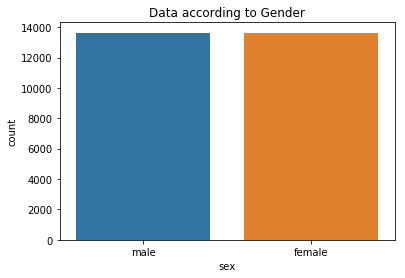

In [27]:
#plotting  the number of data for each gender
sb.countplot(masterdata.sex)
plt.title("Data according to Gender")
plt.savefig('GenderCount.png')
plt.show()

In [28]:
##### The ratio of male and female number in the dataset is almost same.

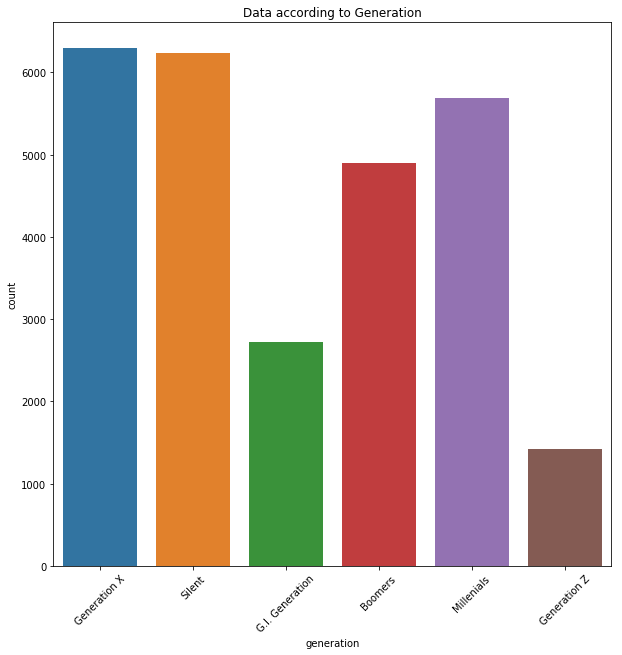

In [29]:
#plotting the number of data for each generation
plt.figure(figsize=(10,10))
sb.countplot(masterdata.generation)
plt.title('Data according to Generation')
plt.xticks(rotation=45)
plt.savefig('GenerationCount.png')
plt.show()

##### The ratio of generation X and silent is almost same but the generation z and G.I generation have the least ratio in the dataset

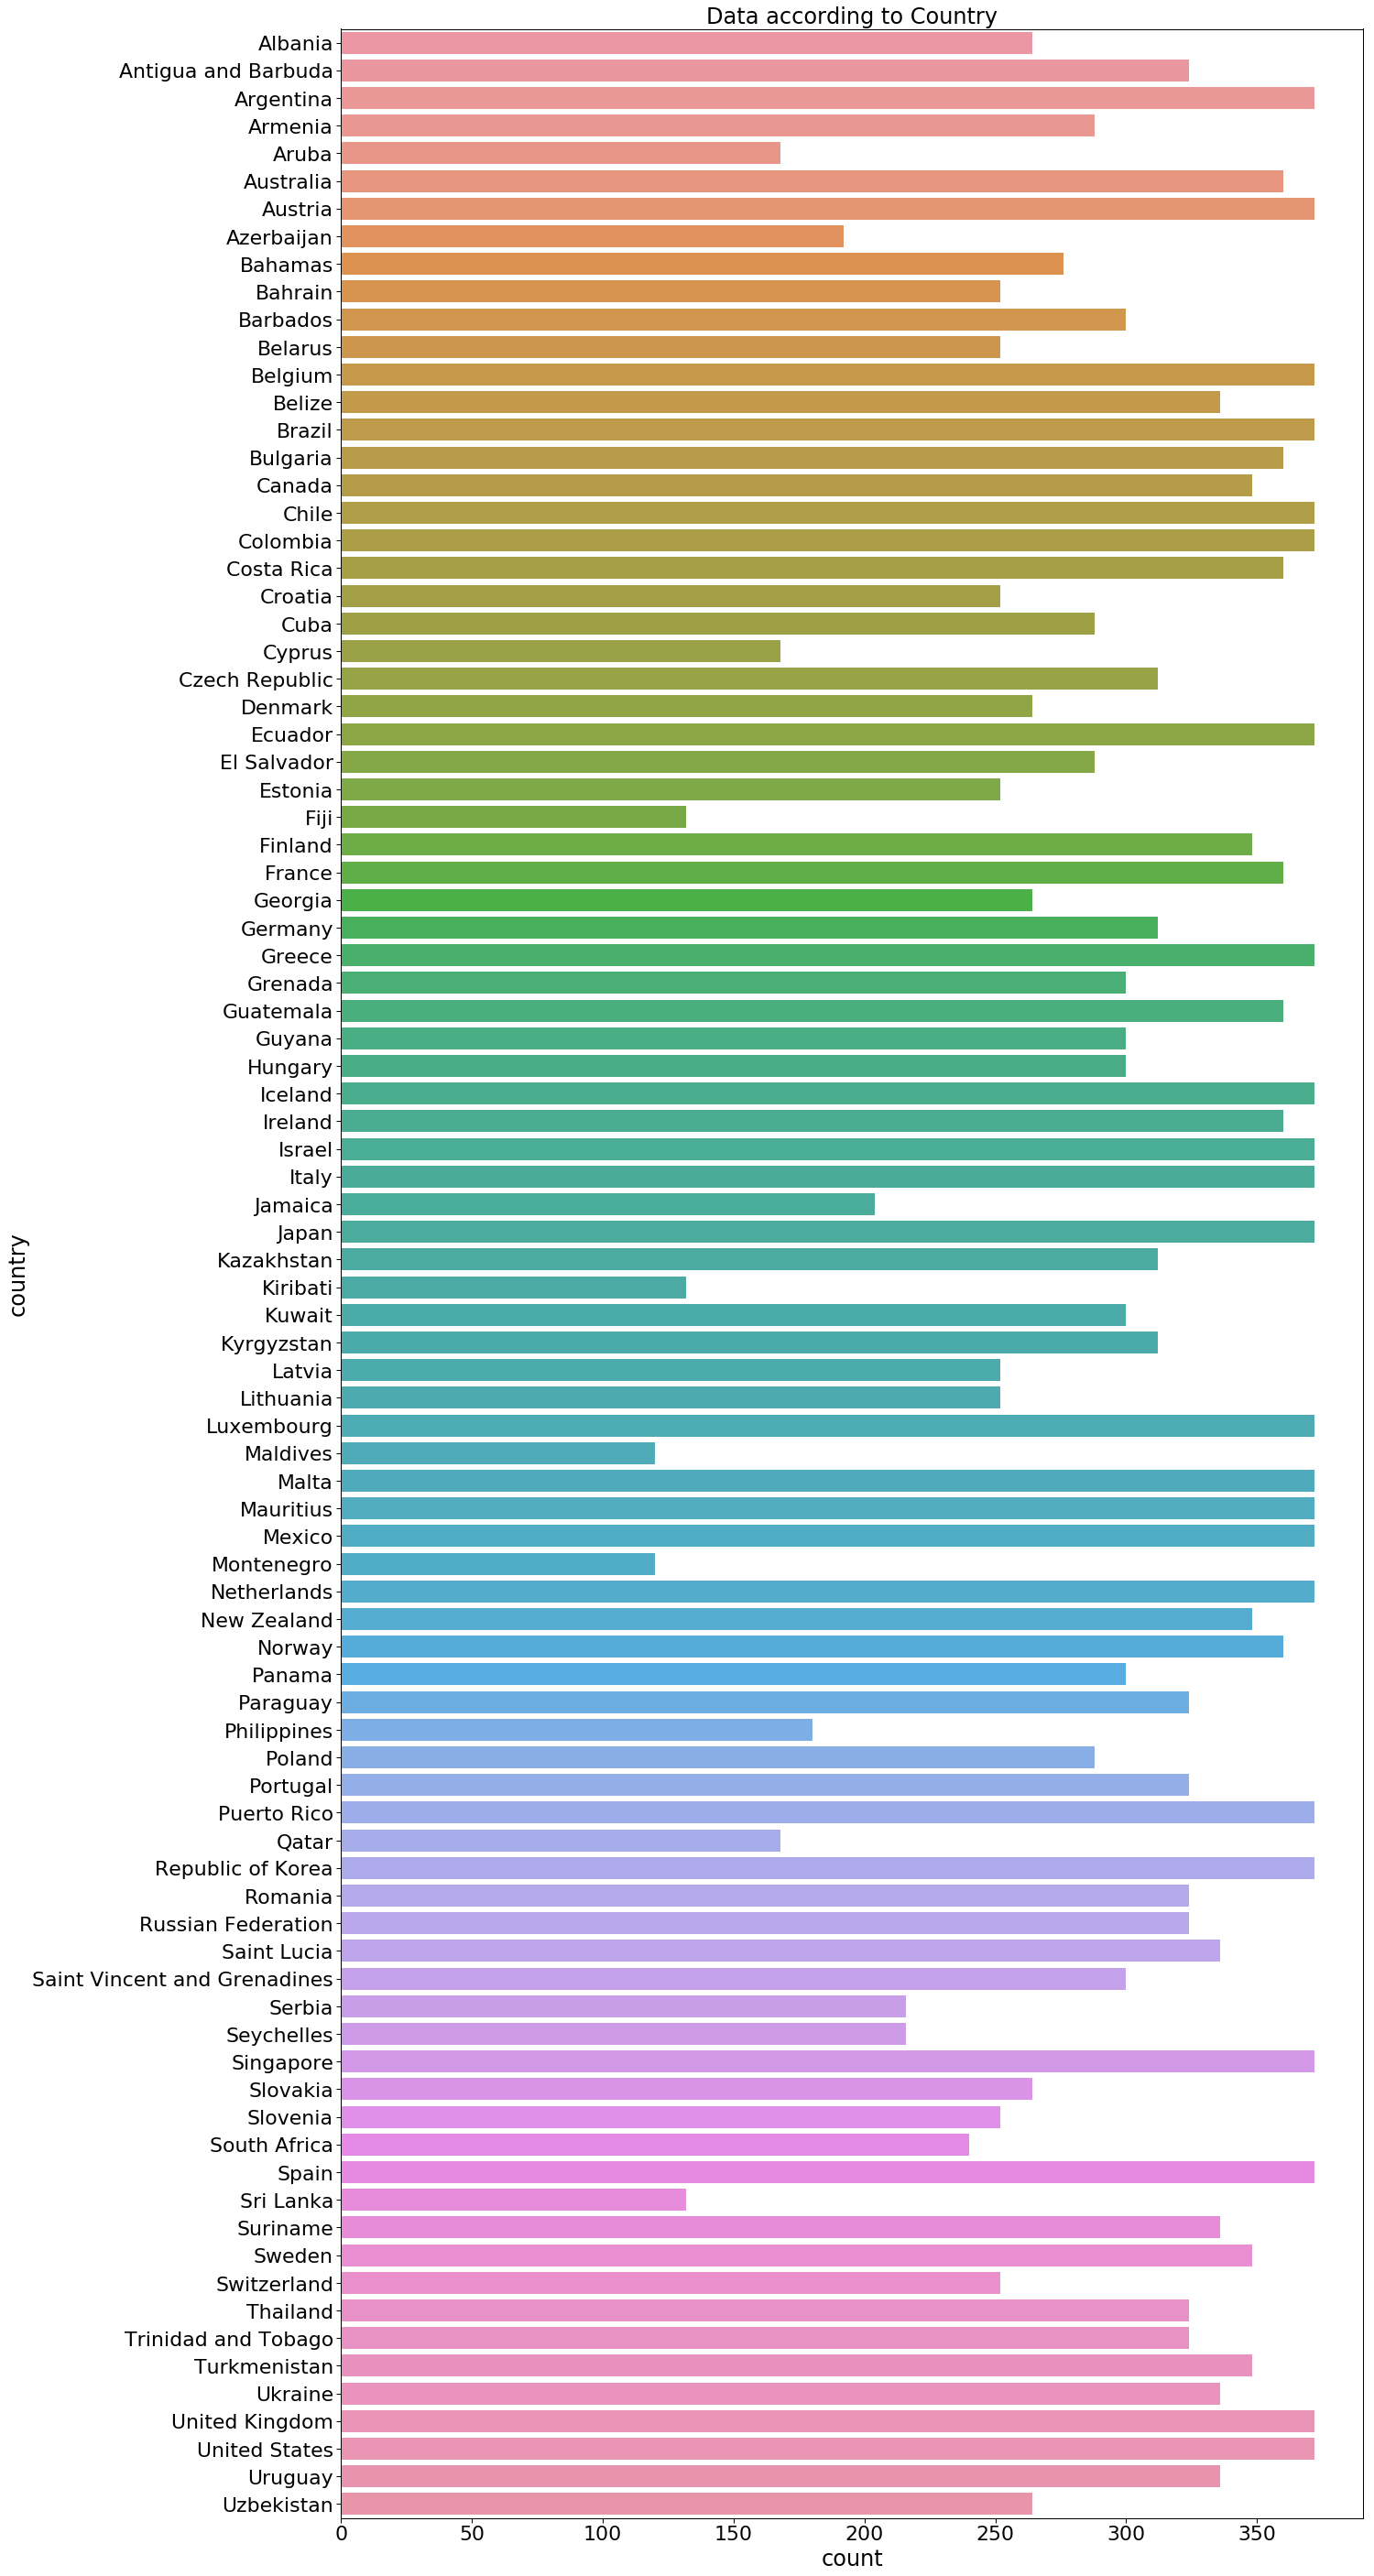

In [30]:
# plotting  the number of data countrywise
plt.figure(figsize=(20,50))
sb.set_context("paper", 2.5, {"lines.linewidth": 4})
sb.countplot(y=masterdata['country'],label='count')
plt.title('Data according to Country')
plt.savefig('DataofCountry.png')
plt.show()

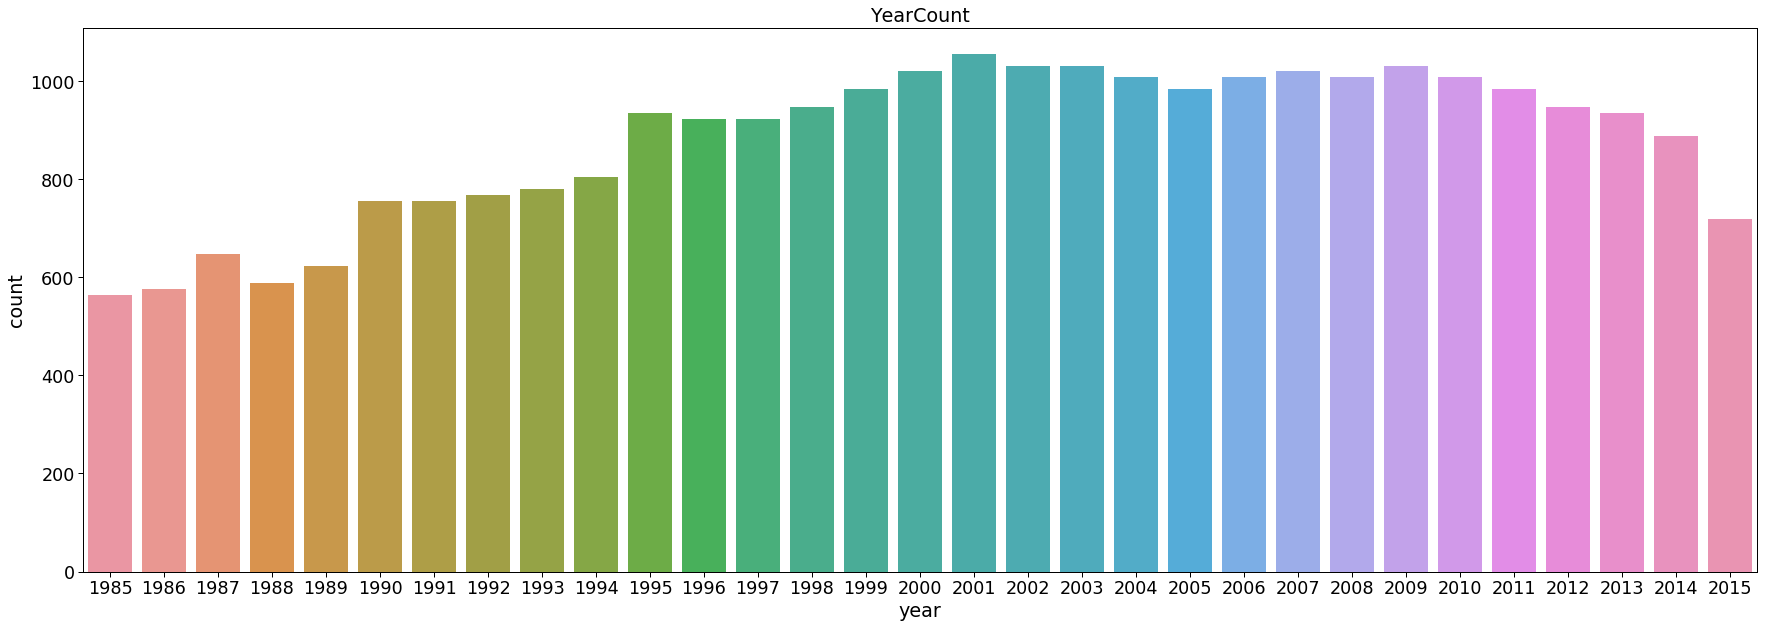

In [31]:
#plotting the number of data in each year
plt.figure(figsize=(30,10))
sb.set_context("paper", 2.0, {"lines.linewidth": 4})
sb.countplot(masterdata['year'],label='count')
plt.title("YearCount")
plt.savefig('Year.png')
plt.show()

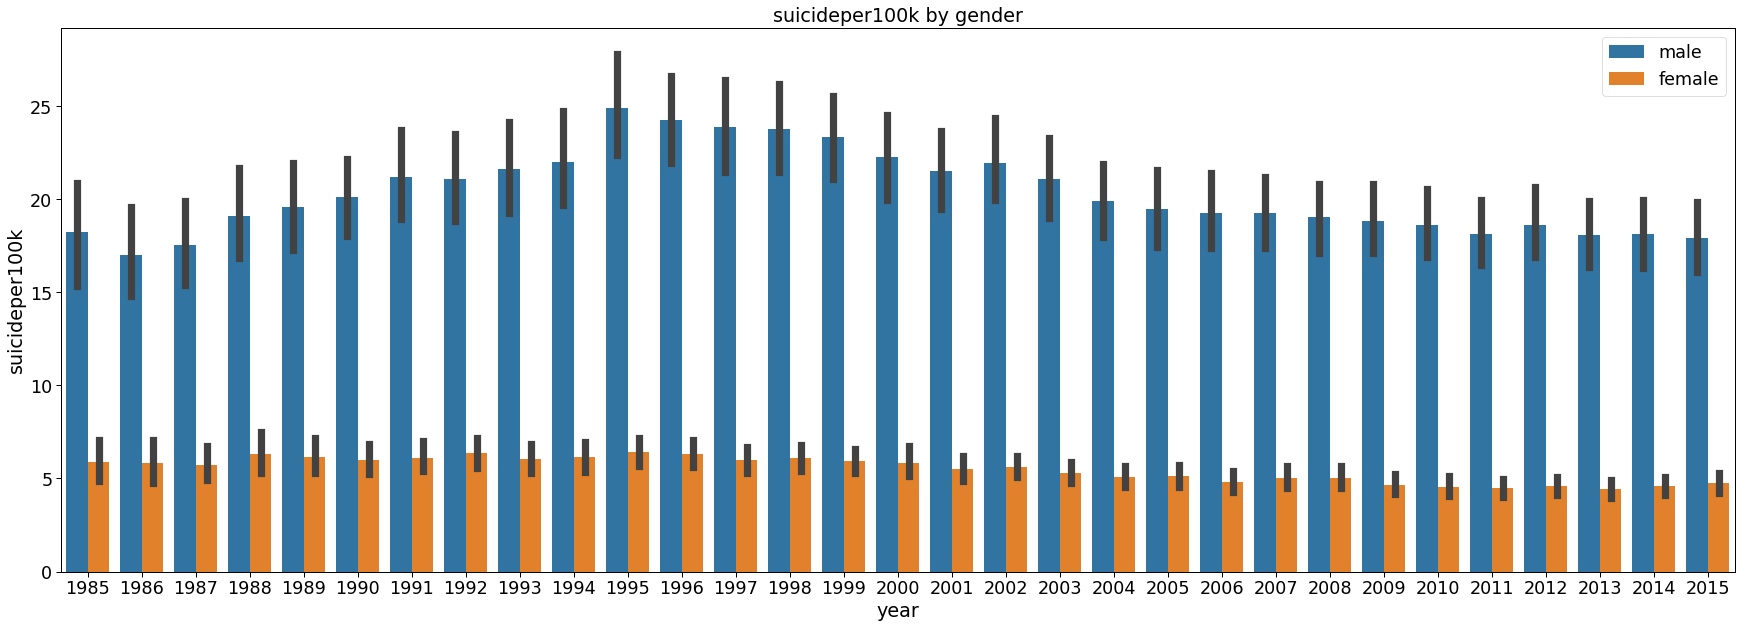

In [32]:
# plotting suicideper100k by gender 
plt.figure(figsize=(30,10))
sb.set_context("paper", 2.0, {"lines.linewidth": 4})
sb.barplot(data=masterdata,x='year',y='suicideper100k',hue='sex')
plt.title('suicideper100k by gender')
plt.savefig('suicideper100k by gender.png')
plt.legend(loc = 'upper right')
plt.show()

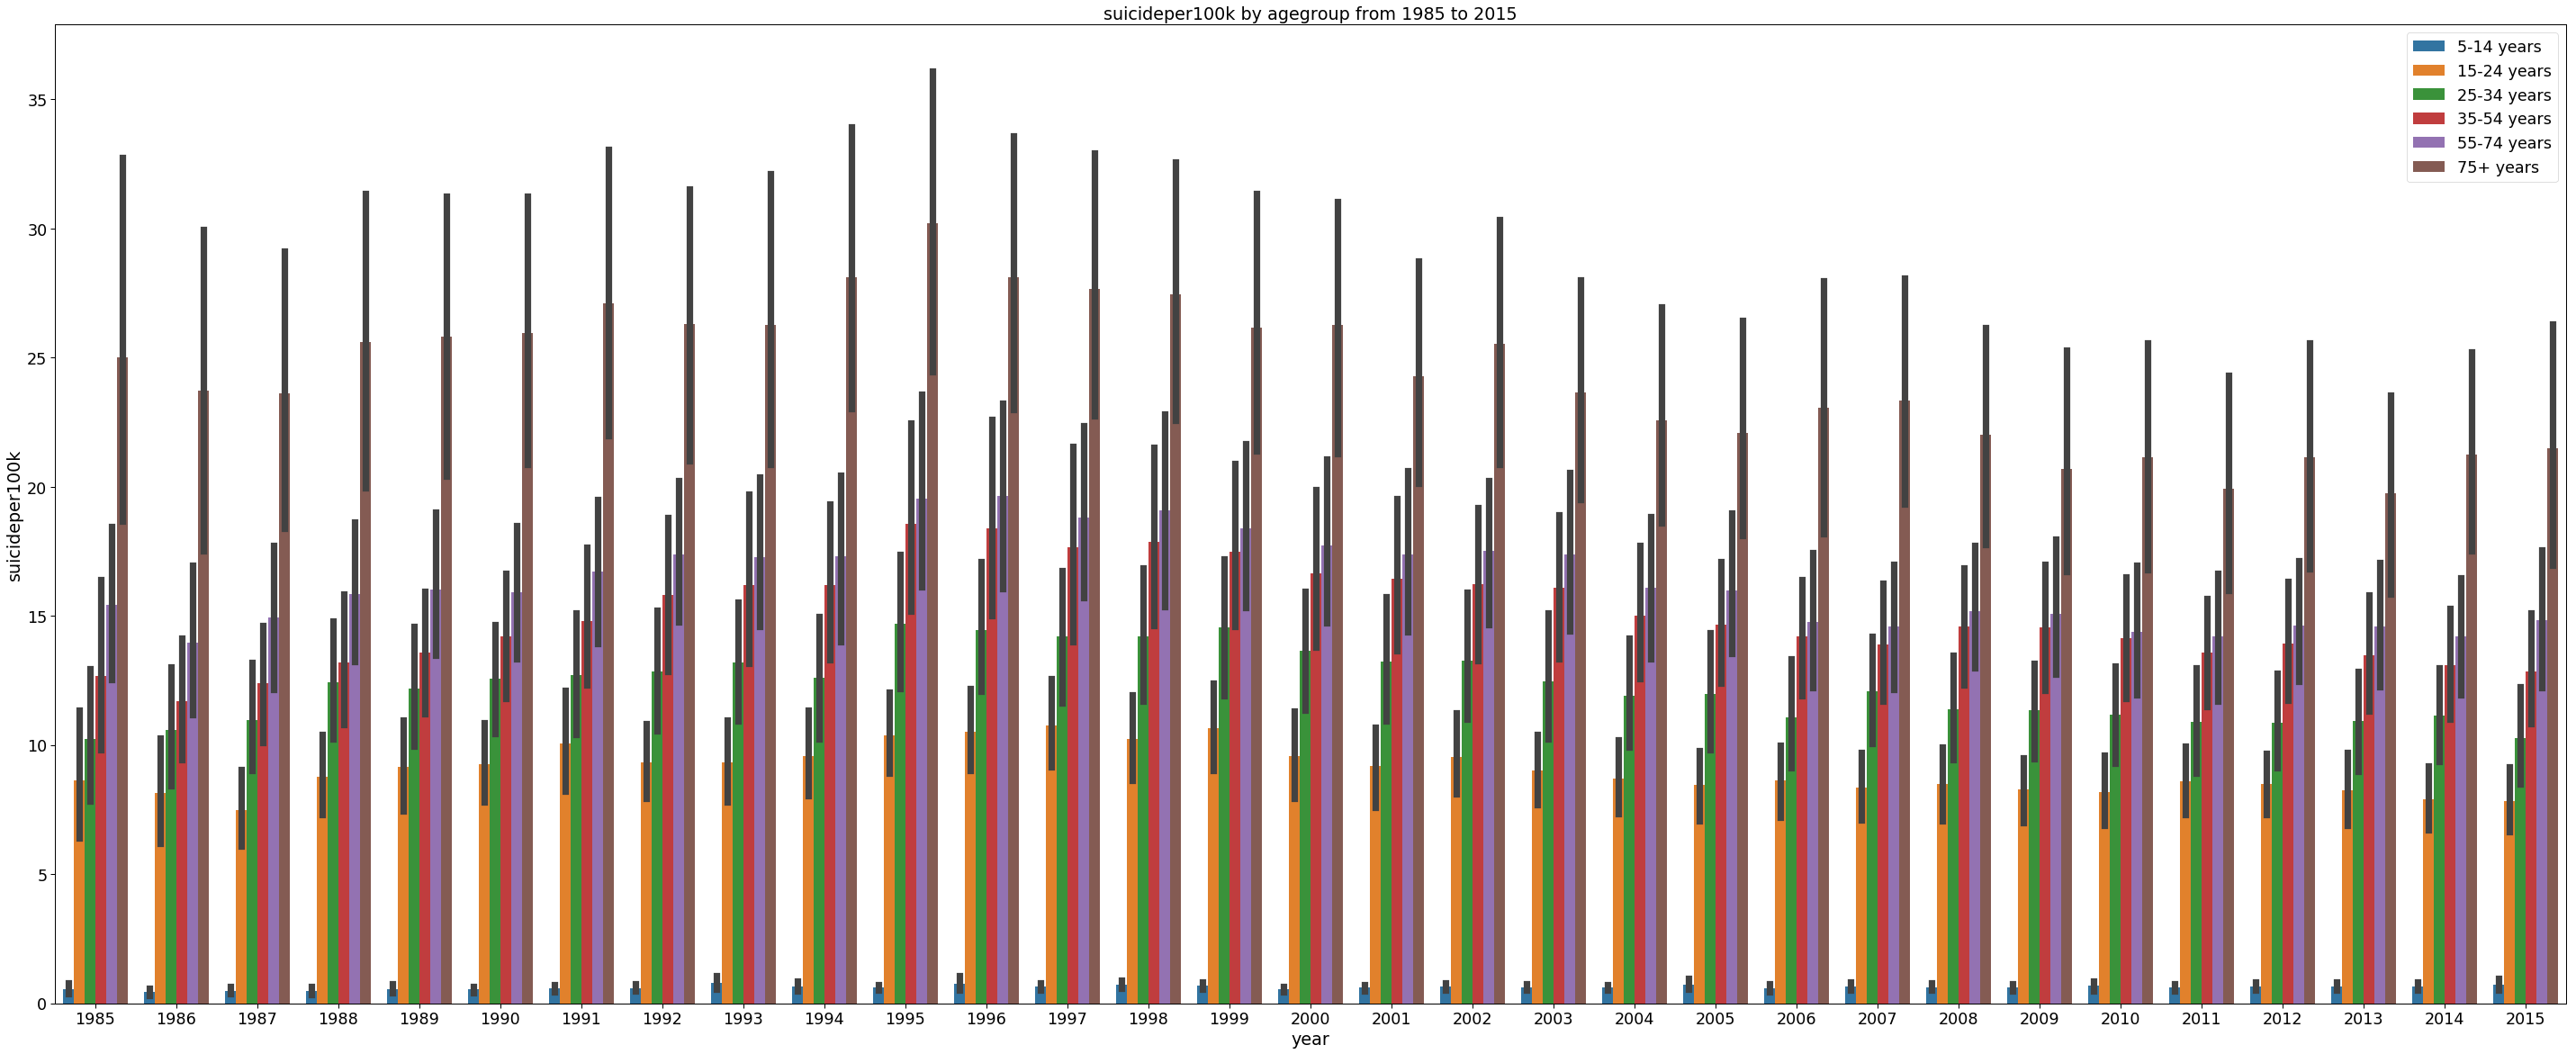

In [33]:
# plotting suicideper100k by ageGroup 
plt.figure(figsize=(50,20))
sb.barplot(data=masterdata,x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k by agegroup from 1985 to 2015')
plt.legend(loc = 'upper right')
plt.savefig('suicideper100k by agegroup.png')
plt.show()

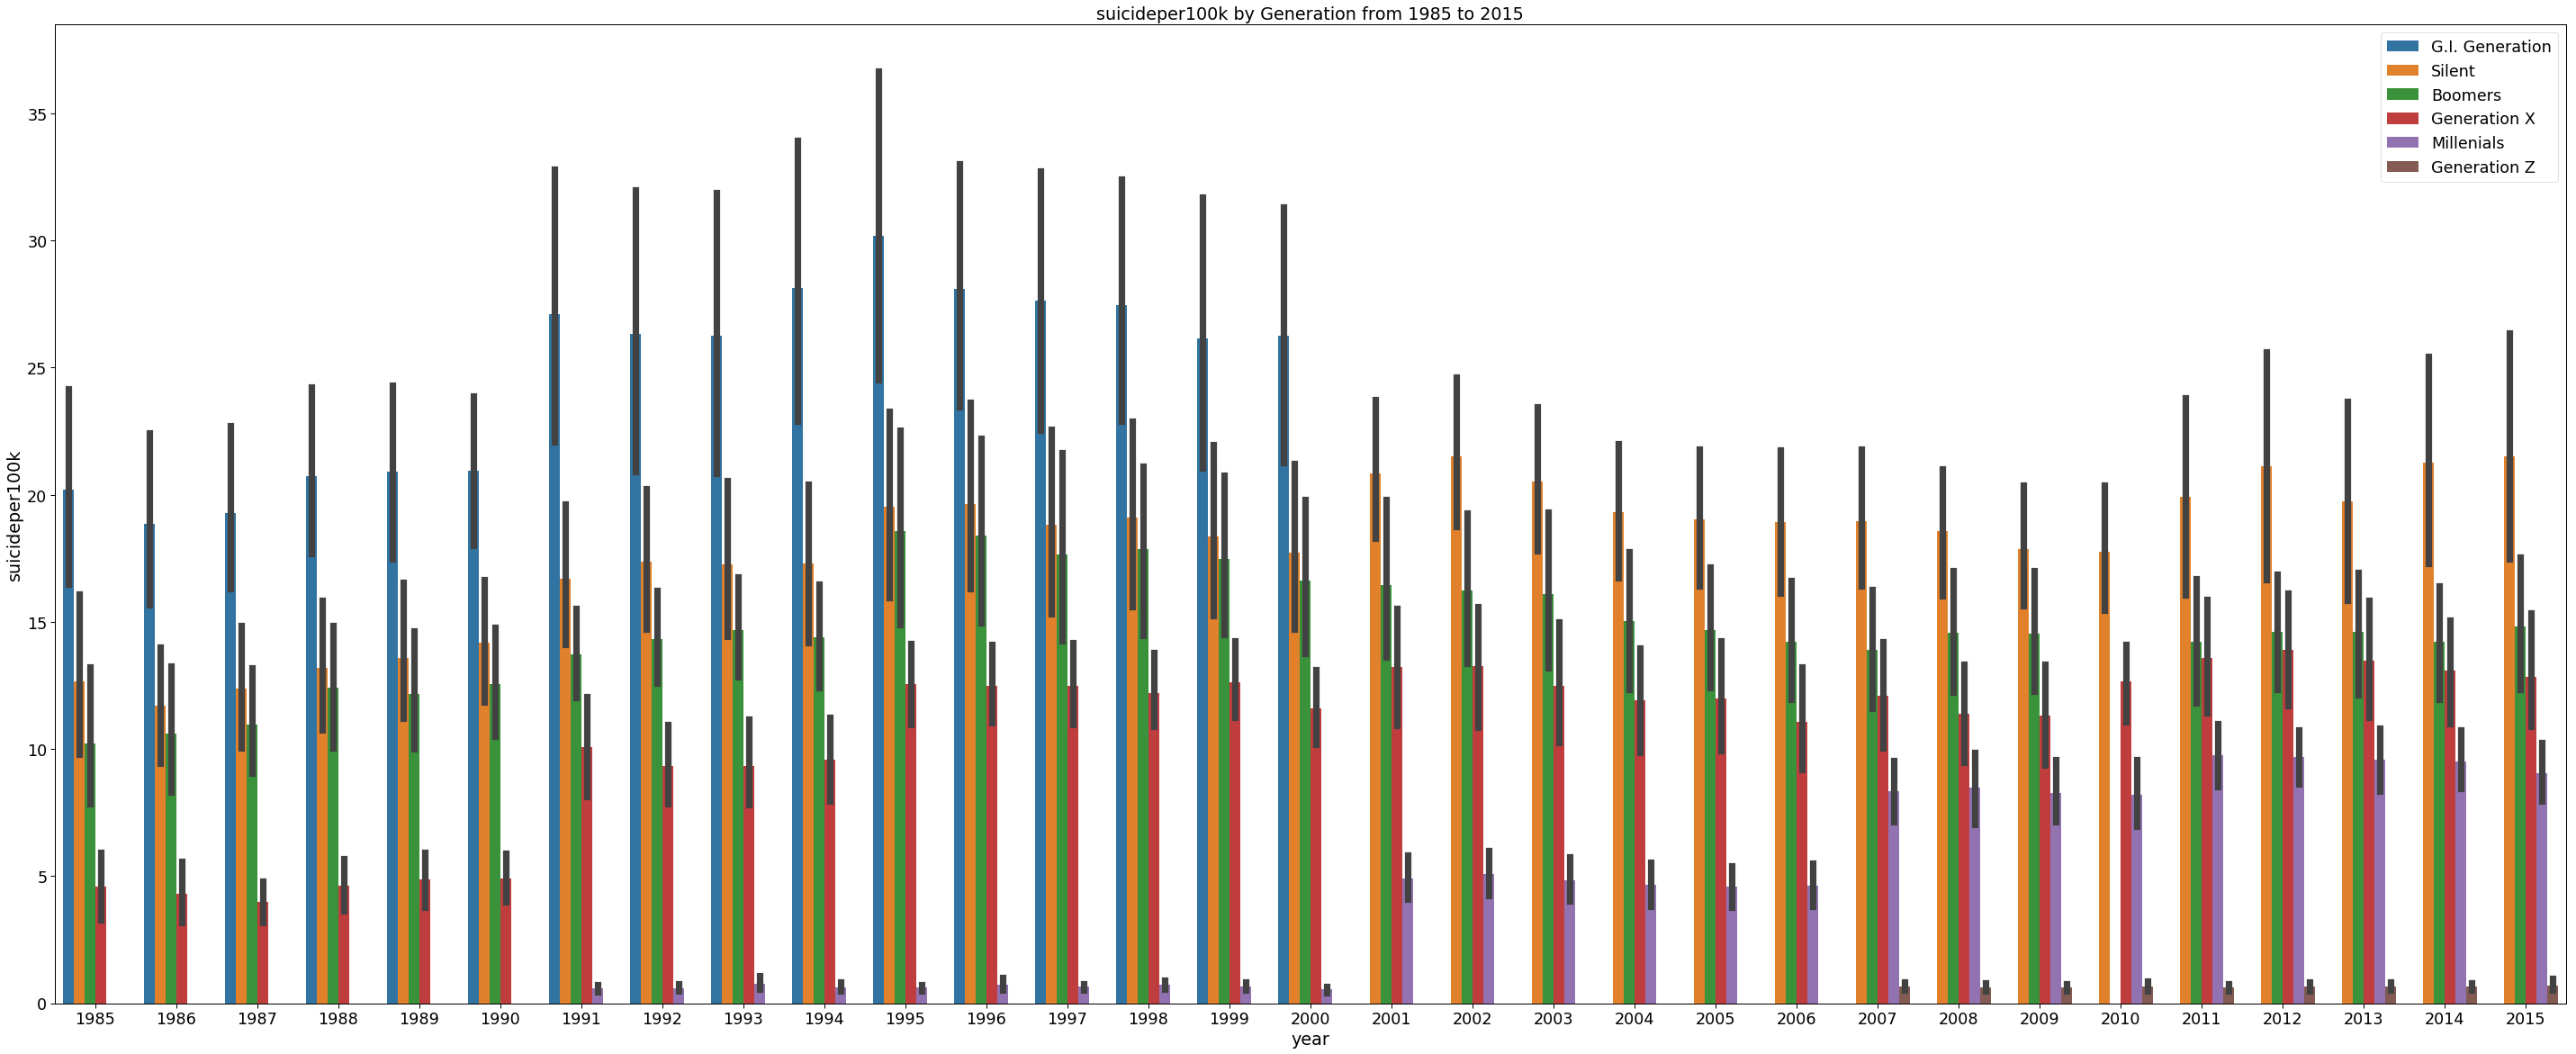

In [34]:
# plotting suicideper100k by generation 
plt.figure(figsize=(50,20))
sb.barplot(data=masterdata,x='year',y='suicideper100k',hue='generation',hue_order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])
plt.title('suicideper100k by Generation from 1985 to 2015')
plt.legend(loc = 'upper right')
plt.savefig('suicideper100k by generation.png')
plt.show()

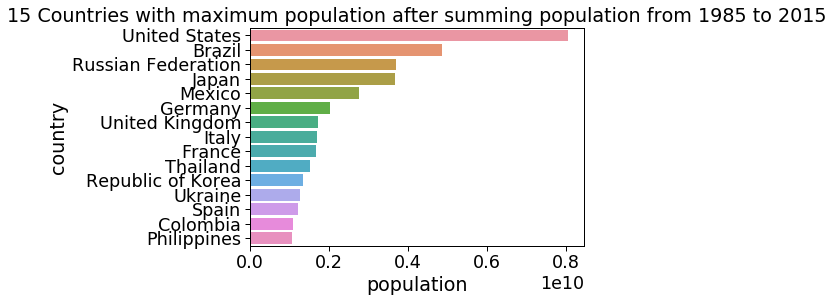

In [35]:
#summing population on the basis of country
country_population=[]

for country in country_list:
    country_population.append(sum(masterdata[(masterdata.country==country)].population))

country_population=pd.DataFrame(country_population,columns=['population'])
country=pd.DataFrame(country_list,columns=['country'])
countryPopulation=pd.concat([country_population,country],axis=1)
countryPopulation=countryPopulation.sort_values(by='population',ascending=False)

#plotting bar graph of top 15 countries with mazimum population
sb.barplot(y=countryPopulation.country[:15],x=countryPopulation.population[:15])
plt.title('15 Countries with maximum population after summing population from 1985 to 2015')
plt.savefig('15 Countries with maximum population after summing population from 1985 to 2015.png')
plt.show()


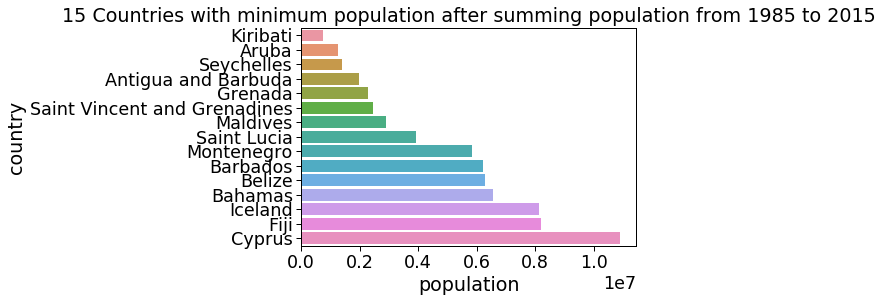

In [36]:
#minimum population in country
countryPopulation=countryPopulation.sort_values(by='population',ascending=True)
#plotting bar graph of top 15 countries with minimum population
sb.barplot(y=countryPopulation.country[:15],x=countryPopulation.population[:15])
plt.title('15 Countries with minimum population after summing population from 1985 to 2015')
plt.savefig('15 Countries with minimum population after summing population from 1985 to 2015.png')
plt.show()

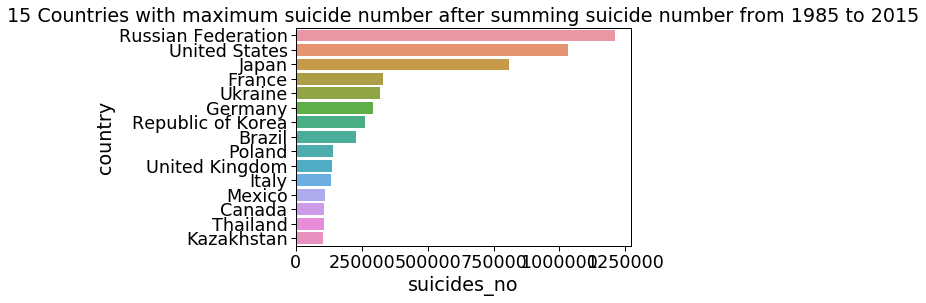

In [37]:
#summing suicides number by country and studying minimum and maximum suicide
suicidesNo=[]
for country in country_list:
    suicidesNo.append(sum(masterdata[masterdata.country==country].suicides_no))

suicidesNo=pd.DataFrame(suicidesNo,columns=['suicides_no'])
country=pd.DataFrame(country_list,columns=['country'])
data_suicide_country=pd.concat([suicidesNo,country],axis=1)
data_suicide_country=data_suicide_country.sort_values(by='suicides_no',ascending=False)

#plotting bar graph of top 15 countries with mazimum suicide number
sb.barplot(y=data_suicide_country.country[:15],x=data_suicide_country.suicides_no[:15])
plt.title('15 Countries with maximum suicide number after summing suicide number from 1985 to 2015')
plt.savefig('15 Countries with maximum suicide number after summing suicide number from 1985 to 2015.png')
plt.show()

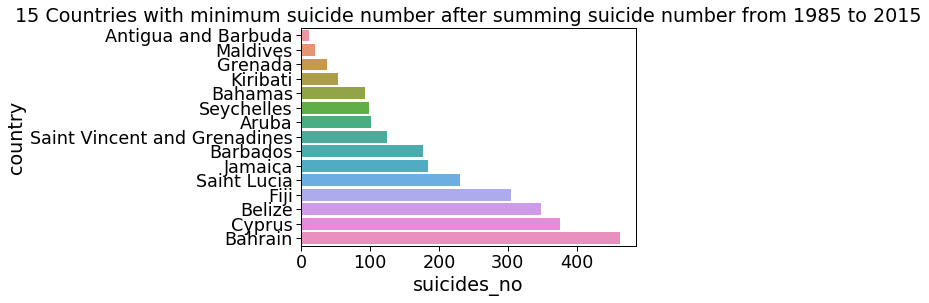

In [38]:
#minimum suicide number
data_suicide_country=data_suicide_country.sort_values(by='suicides_no',ascending=True)
#plotting bar graph of top 15 countries with minimum suicide number
sb.barplot(y=data_suicide_country.country[:15],x=data_suicide_country.suicides_no[:15])
plt.title('15 Countries with minimum suicide number after summing suicide number from 1985 to 2015')
plt.savefig('15 Countries with minimum suicide number after summing suicide number from 1985 to 2015.png')
plt.show()

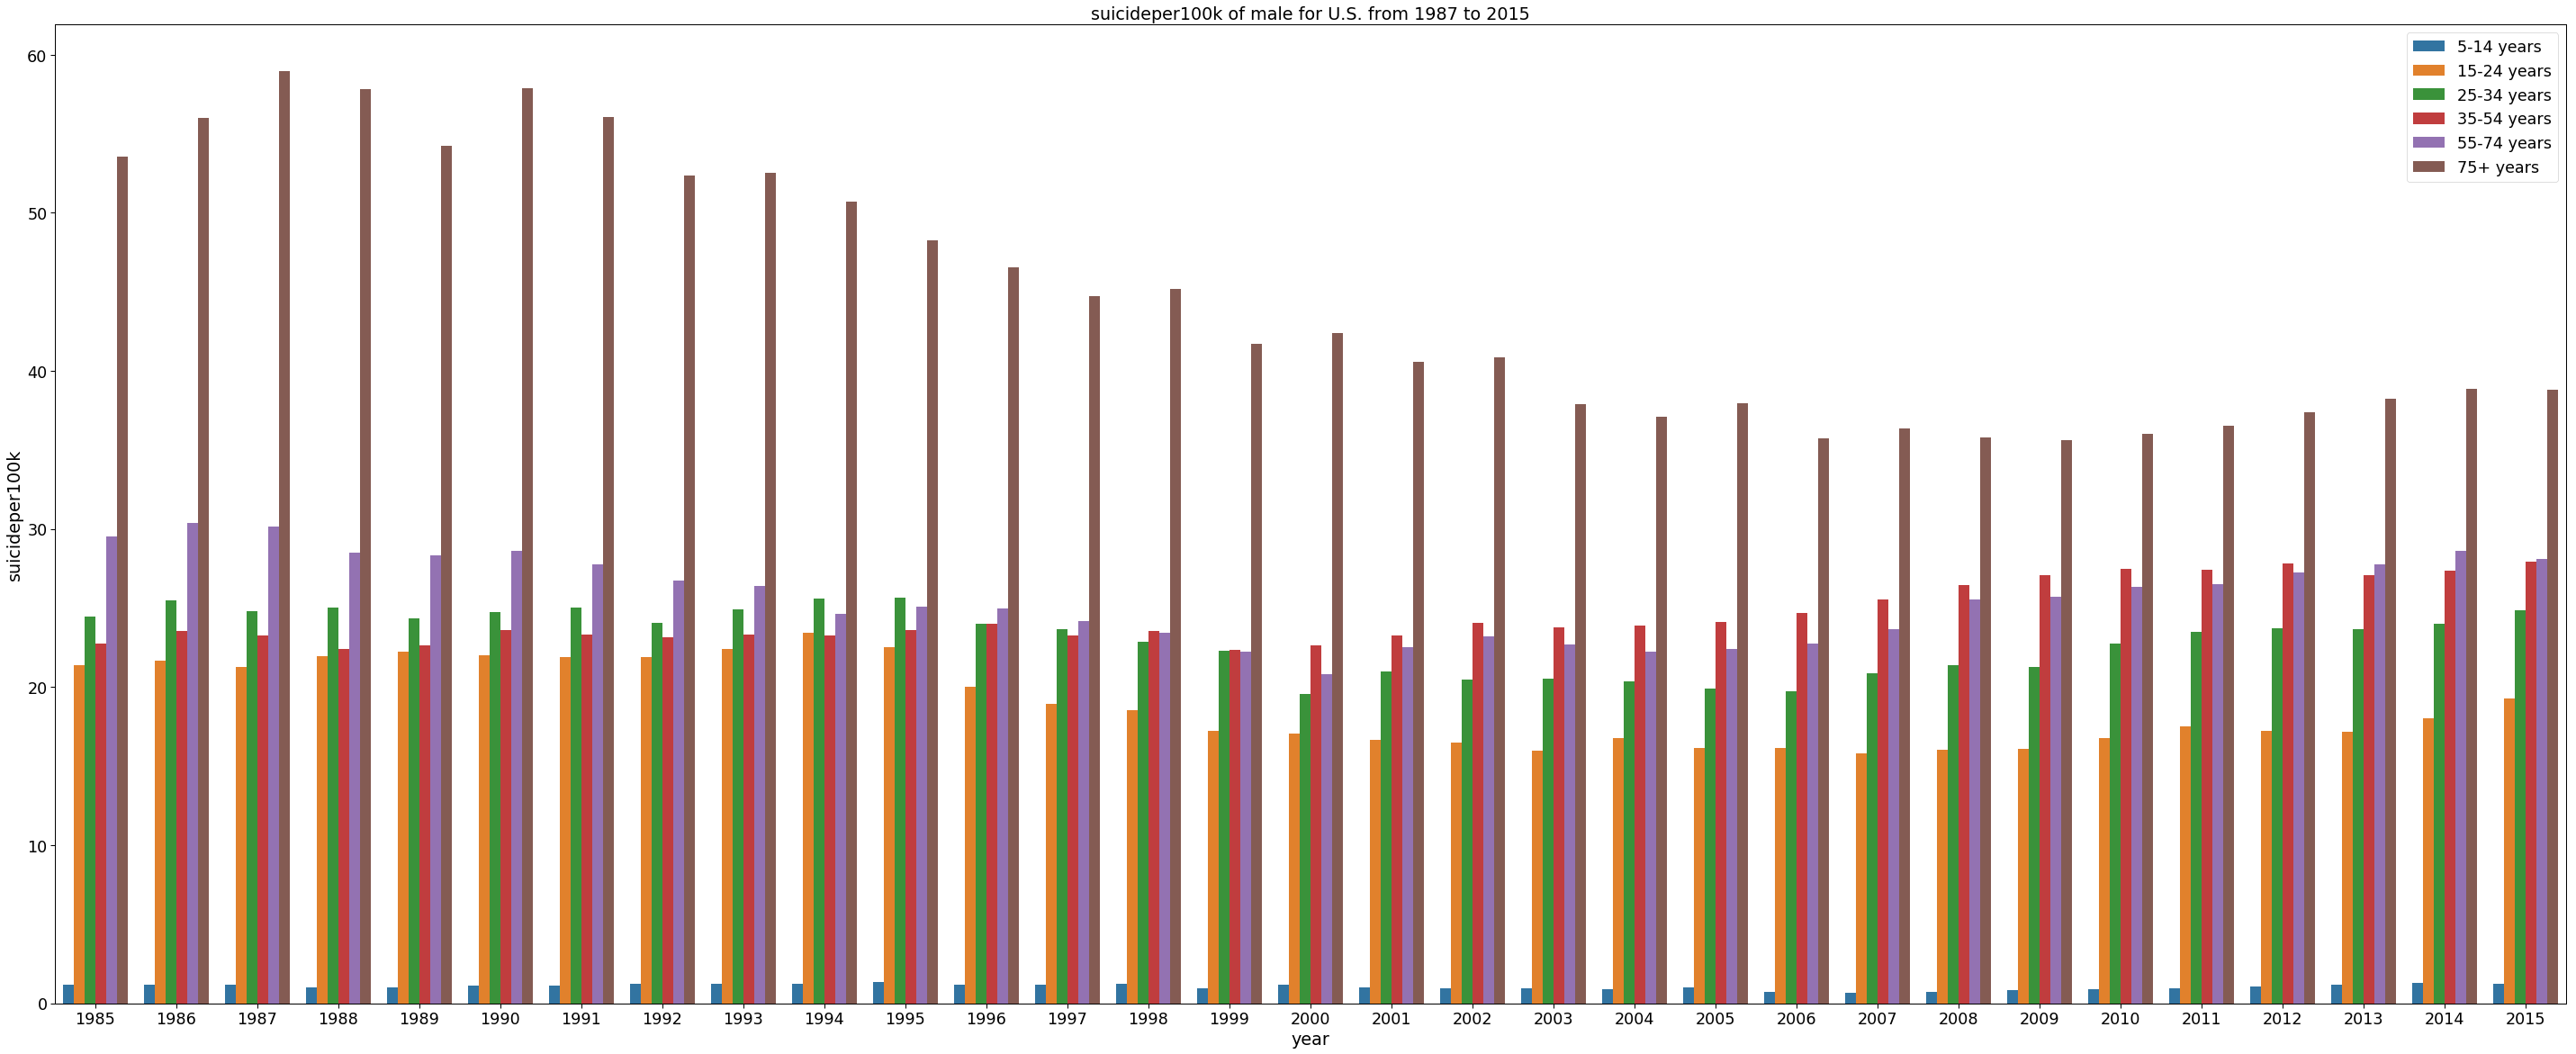

In [39]:
#suicideper100k by USA for 15 years for male
plt.figure(figsize=(50,20))
sb.barplot(data=masterdata[(masterdata.country=='United States') & (masterdata.sex=='male')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of male for U.S. from 1987 to 2015')
plt.legend(loc = 'upper right')
plt.savefig('suicideper100k by male for U.S. from 1987 to 2015.png')
plt.show()

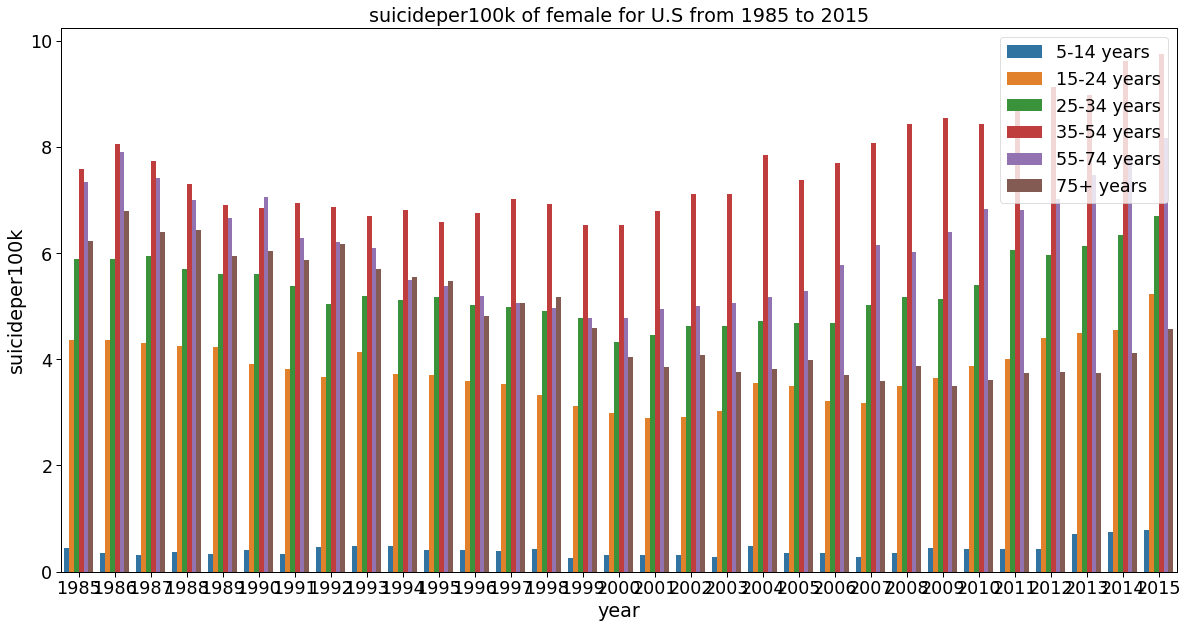

In [40]:
#suicideper100k by USA for 15 years for female
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='United States')& (masterdata.sex=='female')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of female for U.S from 1985 to 2015')
plt.legend(loc = 'upper right')
plt.show()

In [41]:
# define method to get sucide rate
def getfilteredData(mainData, country,gender,age):
    filetereddataset=[]
    filetereddataset =mainData[(mainData.country==country)  & (mainData.sex==gender) & (mainData.age==age)]
    return filetereddataset

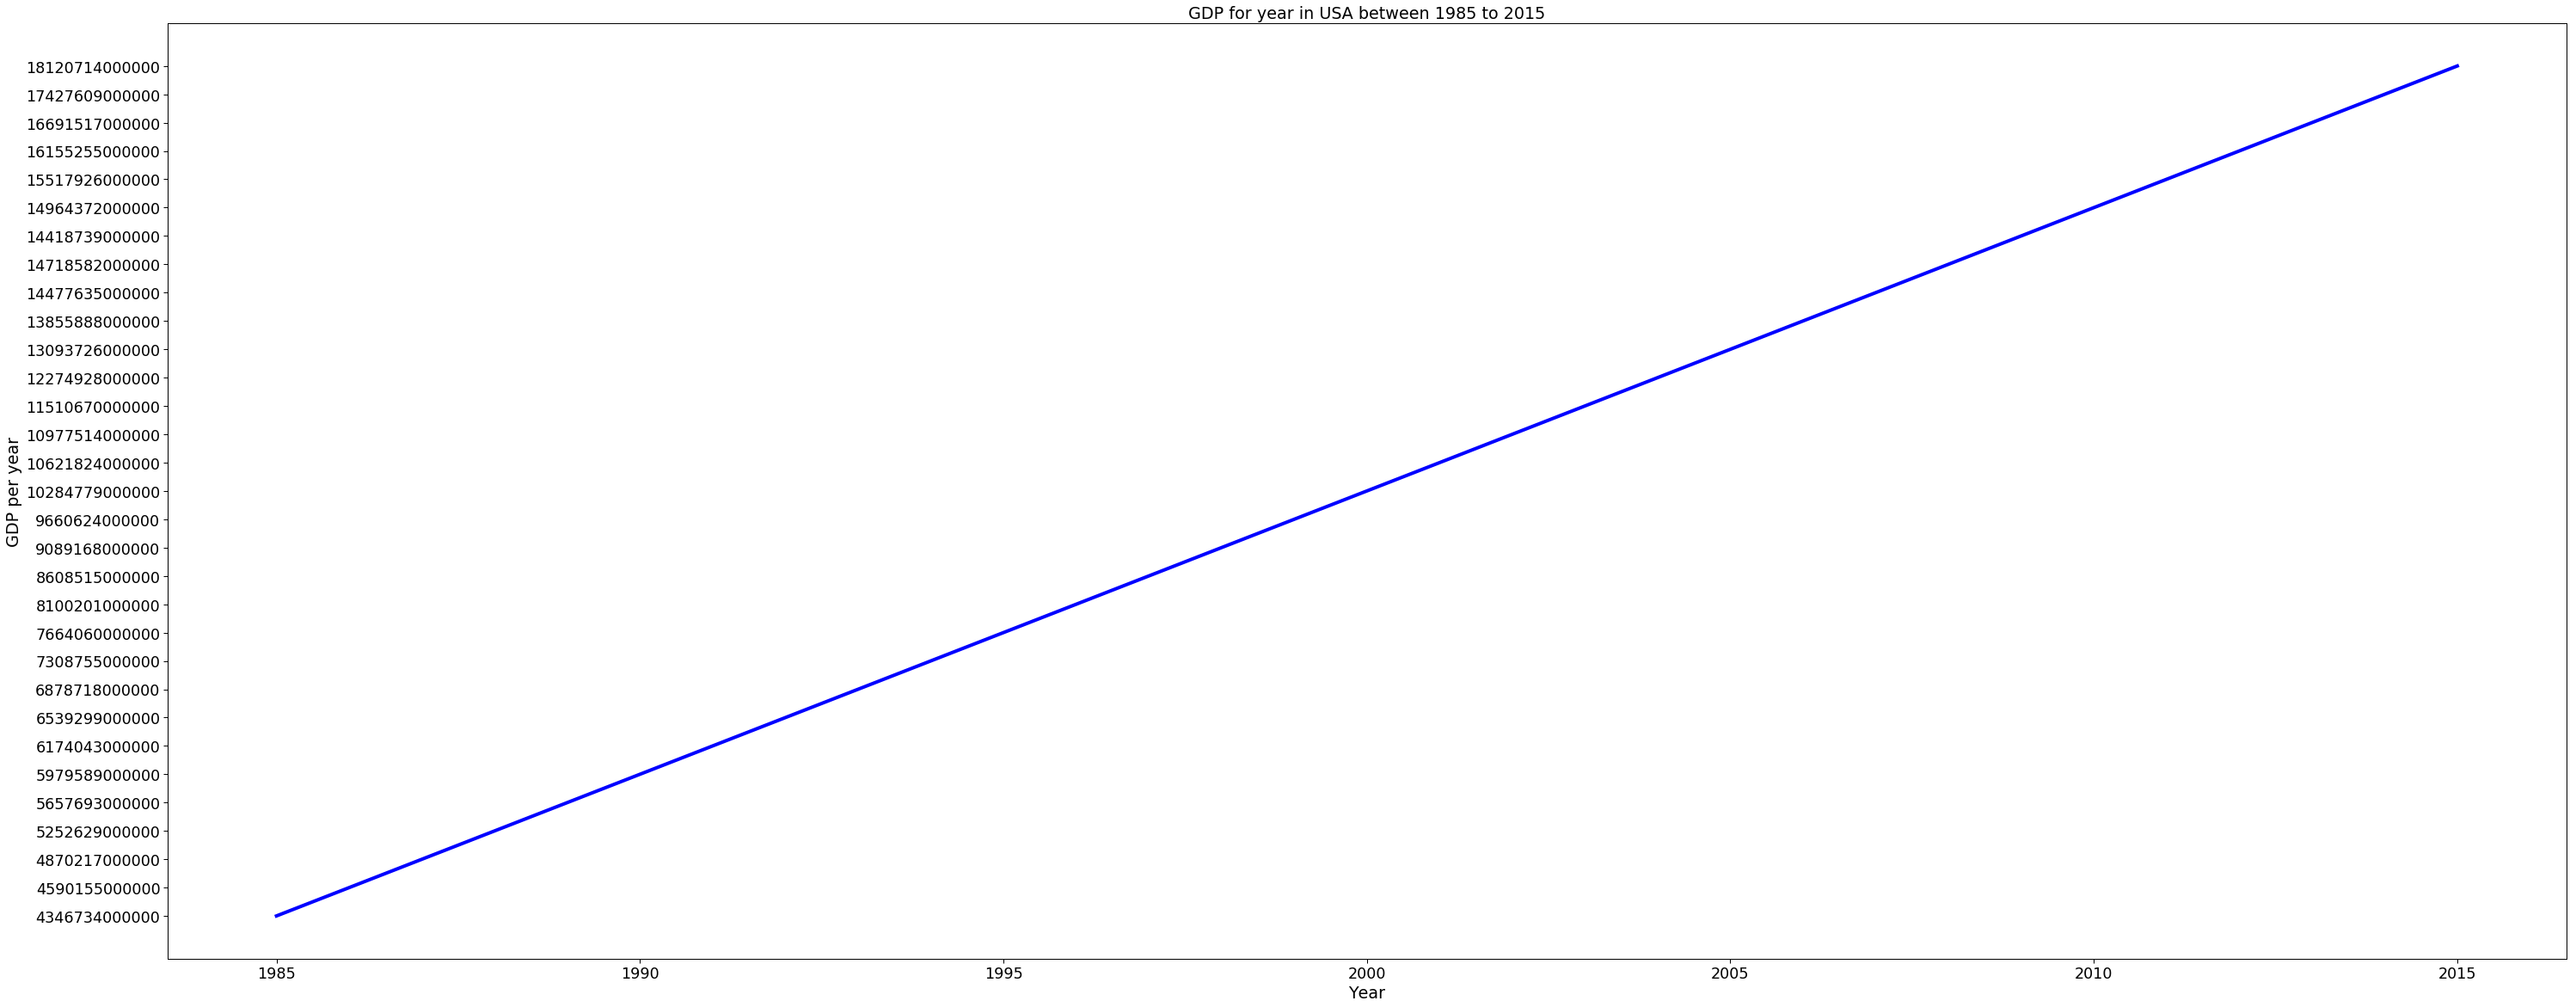

In [42]:
#studying about gdp per year and gdp_per capita it is same for all age group of USA
plt.figure(figsize = (50,20))
plt.plot(year_list, getfilteredData(masterdata,'United States','male','5-14 years').gdp_for_year, color = "blue")
plt.title('GDP for year in USA between 1985 to 2015')
plt.ylabel('GDP per year')
plt.xlabel('Year')
plt.show()

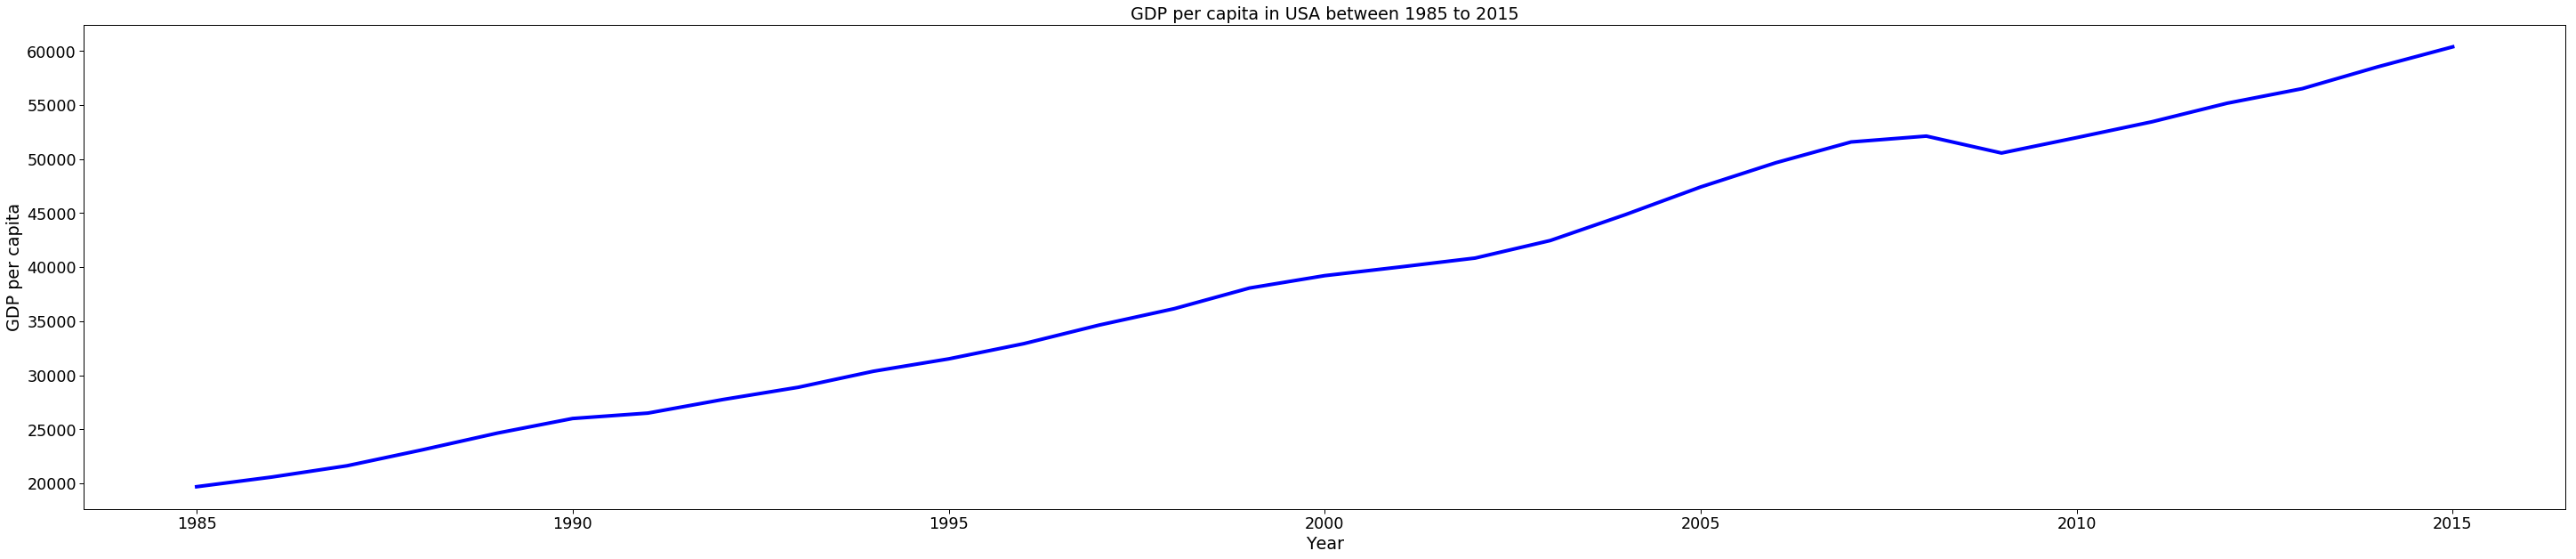

In [43]:
#studying about gdp per capita of USA
plt.figure(figsize = (50,10))
plt.plot(year_list, getfilteredData(masterdata,'United States','male','5-14 years').gdp_per_capita , color = "blue")
plt.title('GDP per capita in USA between 1985 to 2015')
plt.ylabel('GDP per capita')
plt.xlabel('Year')
plt.savefig('GDP per capita in USA between 1985 to 2015 .png')
plt.show()

In [44]:
## Study about United Kingdom

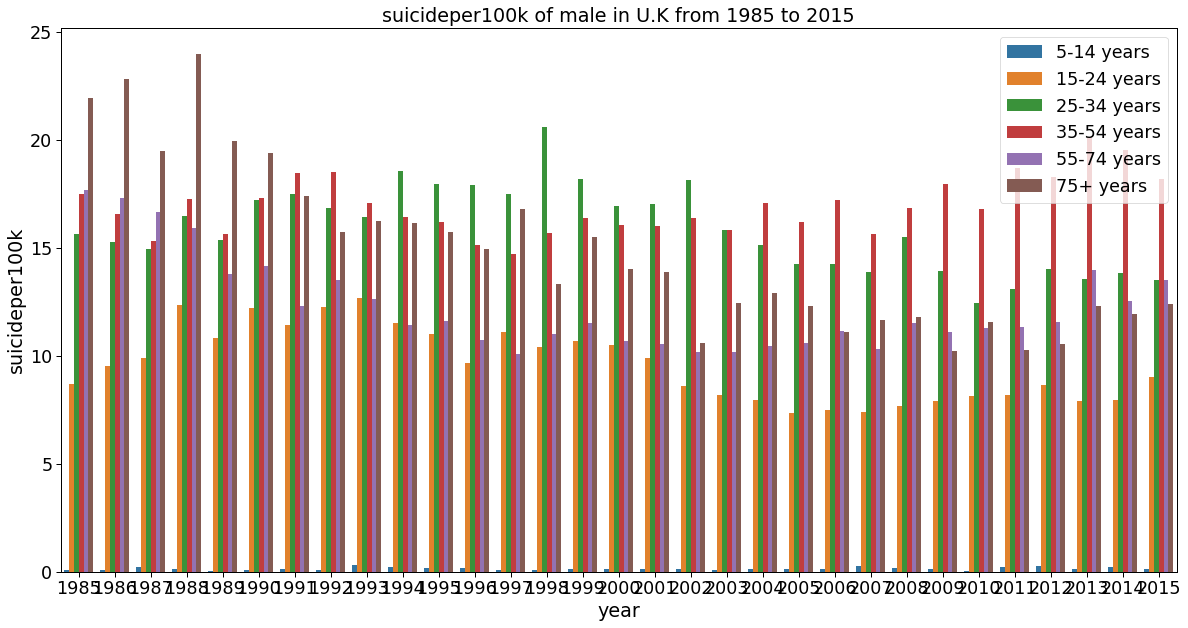

In [45]:
#suicideper100k of UK for 15 years for male
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='United Kingdom') & (masterdata.sex=='male')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of male in U.K from 1985 to 2015')
plt.legend(loc = 'upper right')
plt.show()

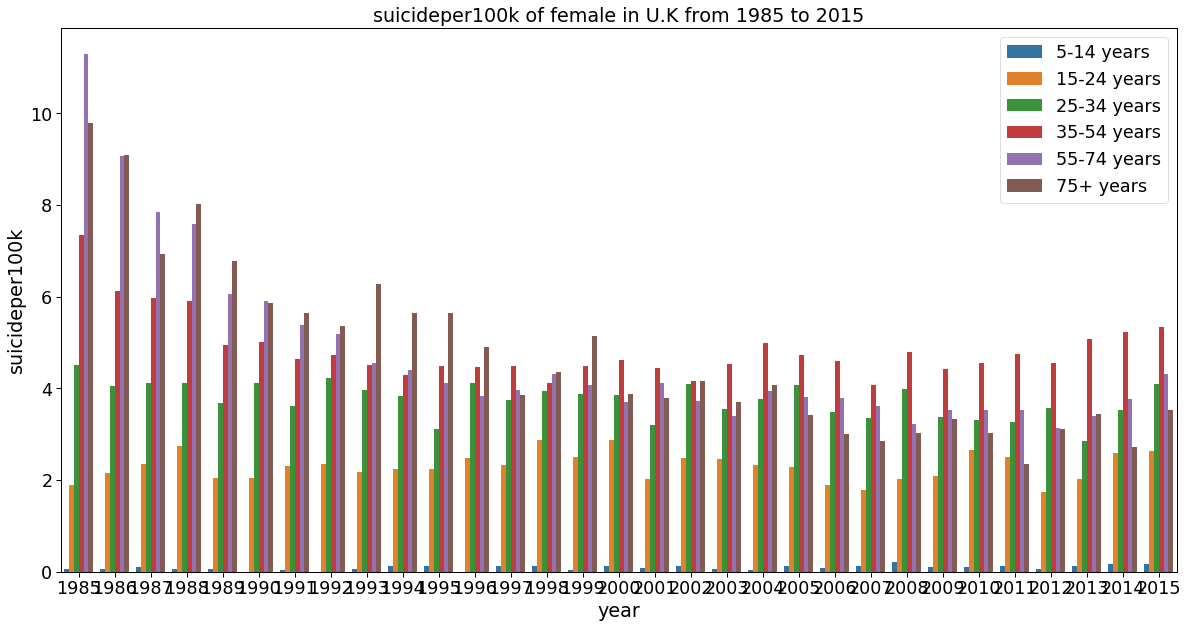

In [46]:
#suicideper100k by UK for 15 years for female
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='United Kingdom') & (masterdata.sex=='female')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of female in U.K from 1985 to 2015')
plt.legend(loc = 'upper right')
plt.show()

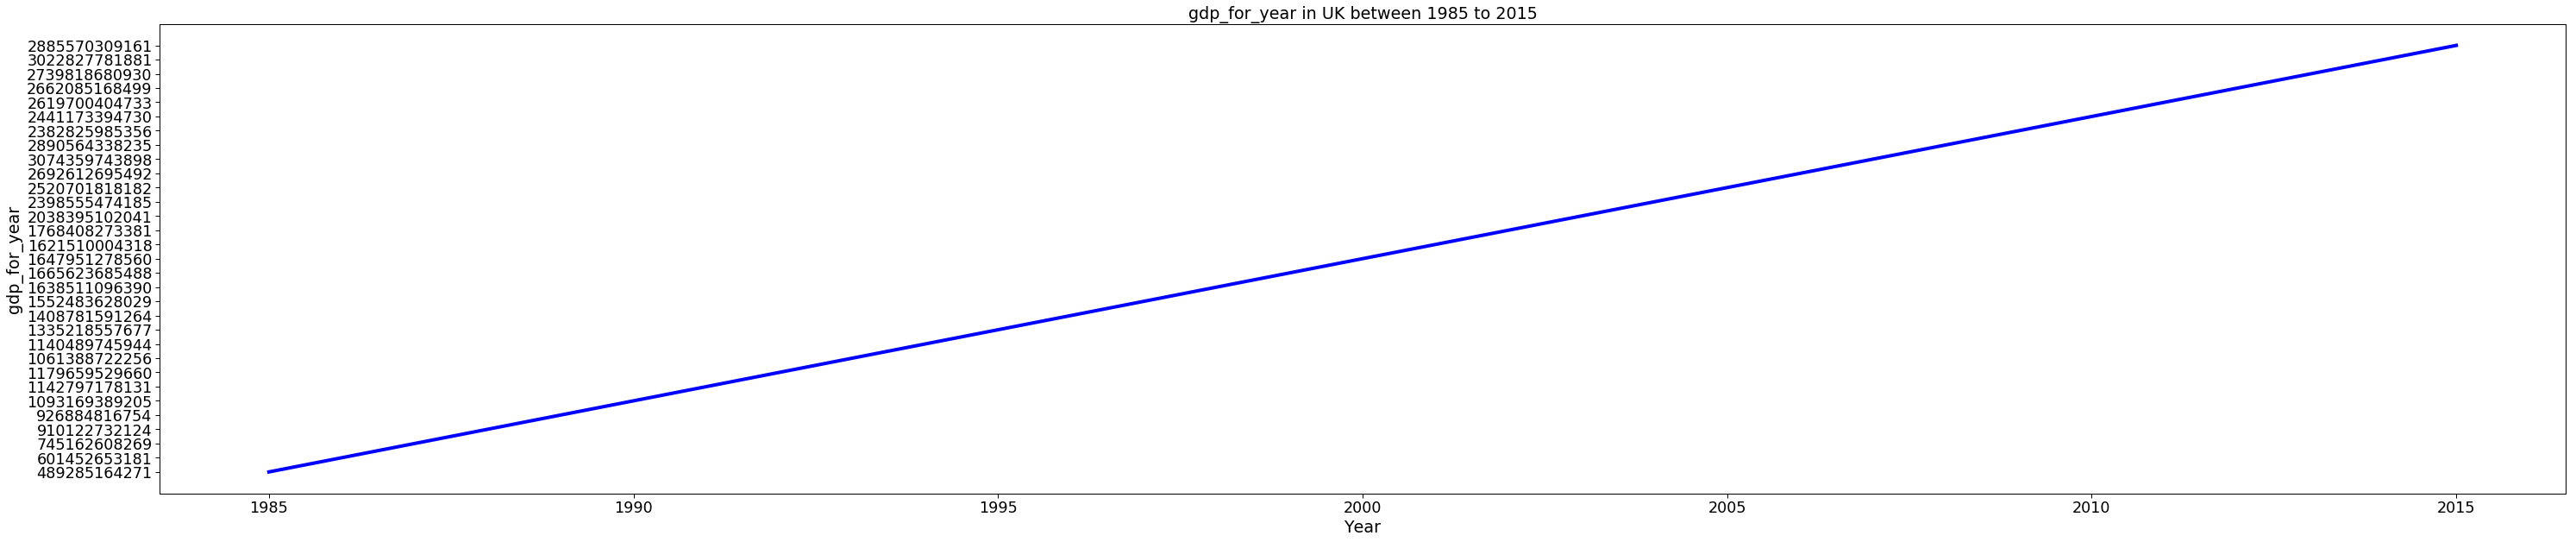

In [47]:
# study about gdp for year of uk
plt.figure(figsize = (50,10))
plt.plot(year_list, getfilteredData(masterdata,'United Kingdom','male','5-14 years').gdp_for_year, color = "blue")
plt.title('gdp_for_year in UK between 1985 to 2015')
plt.ylabel('gdp_for_year')
plt.xlabel('Year')
plt.savefig('gdp_per_year in UK between 1985 to 2015.png')
plt.show()

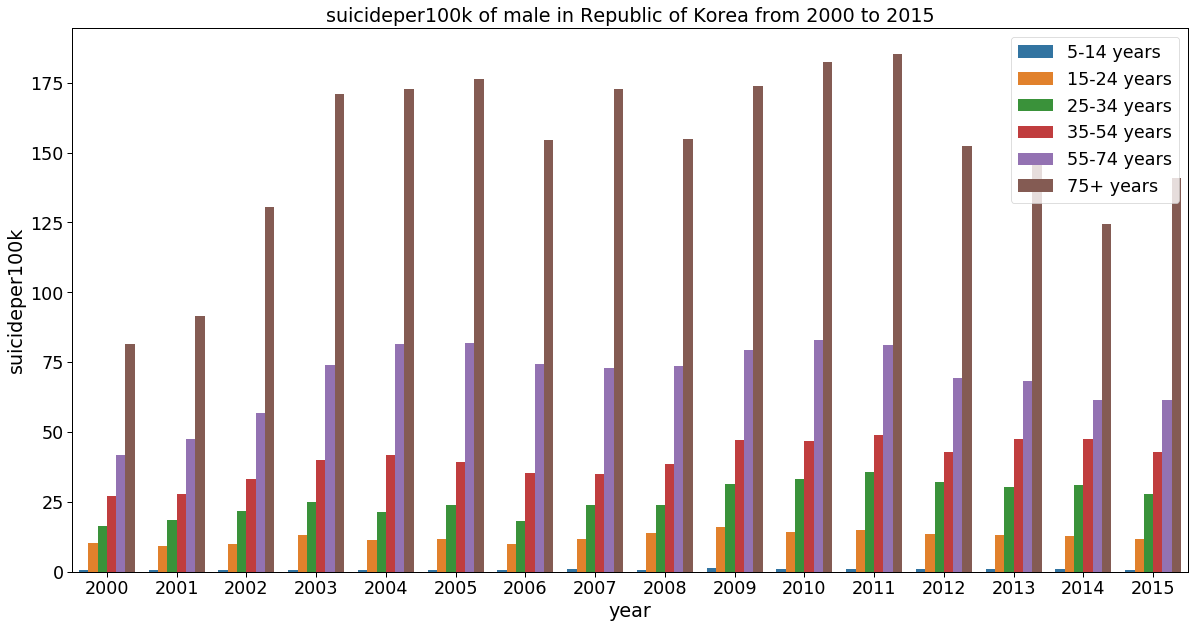

In [48]:
#study about Republic of Korea
#suicideper100k by Republic of Korea for 15 years for male
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='Republic of Korea')& (masterdata.year>1999) & (masterdata.sex=='male')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of male in Republic of Korea from 2000 to 2015')
plt.legend(loc = 'upper right')
plt.savefig('suicideper100k of male in Republic of Korea from 2000 to 2015.png')
plt.show()

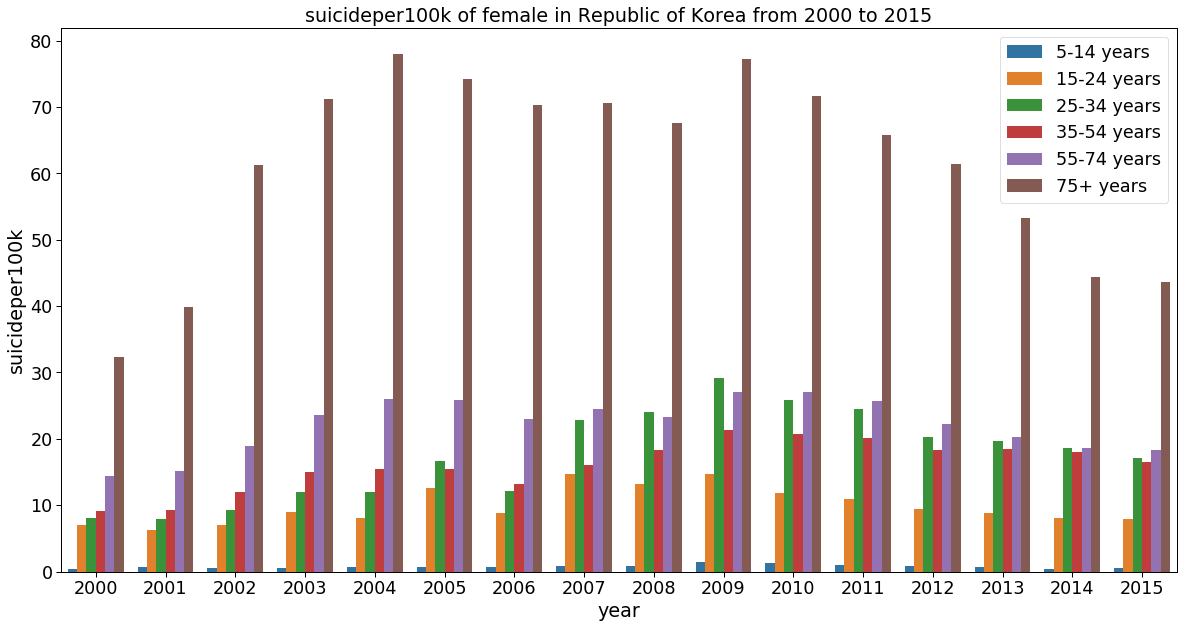

In [49]:
#suicideper100k by Republic of Korea for 15 years for female
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='Republic of Korea')& (masterdata.year>1999) & (masterdata.sex=='female')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of female in Republic of Korea from 2000 to 2015')
plt.legend(loc = 'upper right')
plt.savefig('suicideper100k of female in Republic of Korea from 2000 to 2015.png')
plt.show()

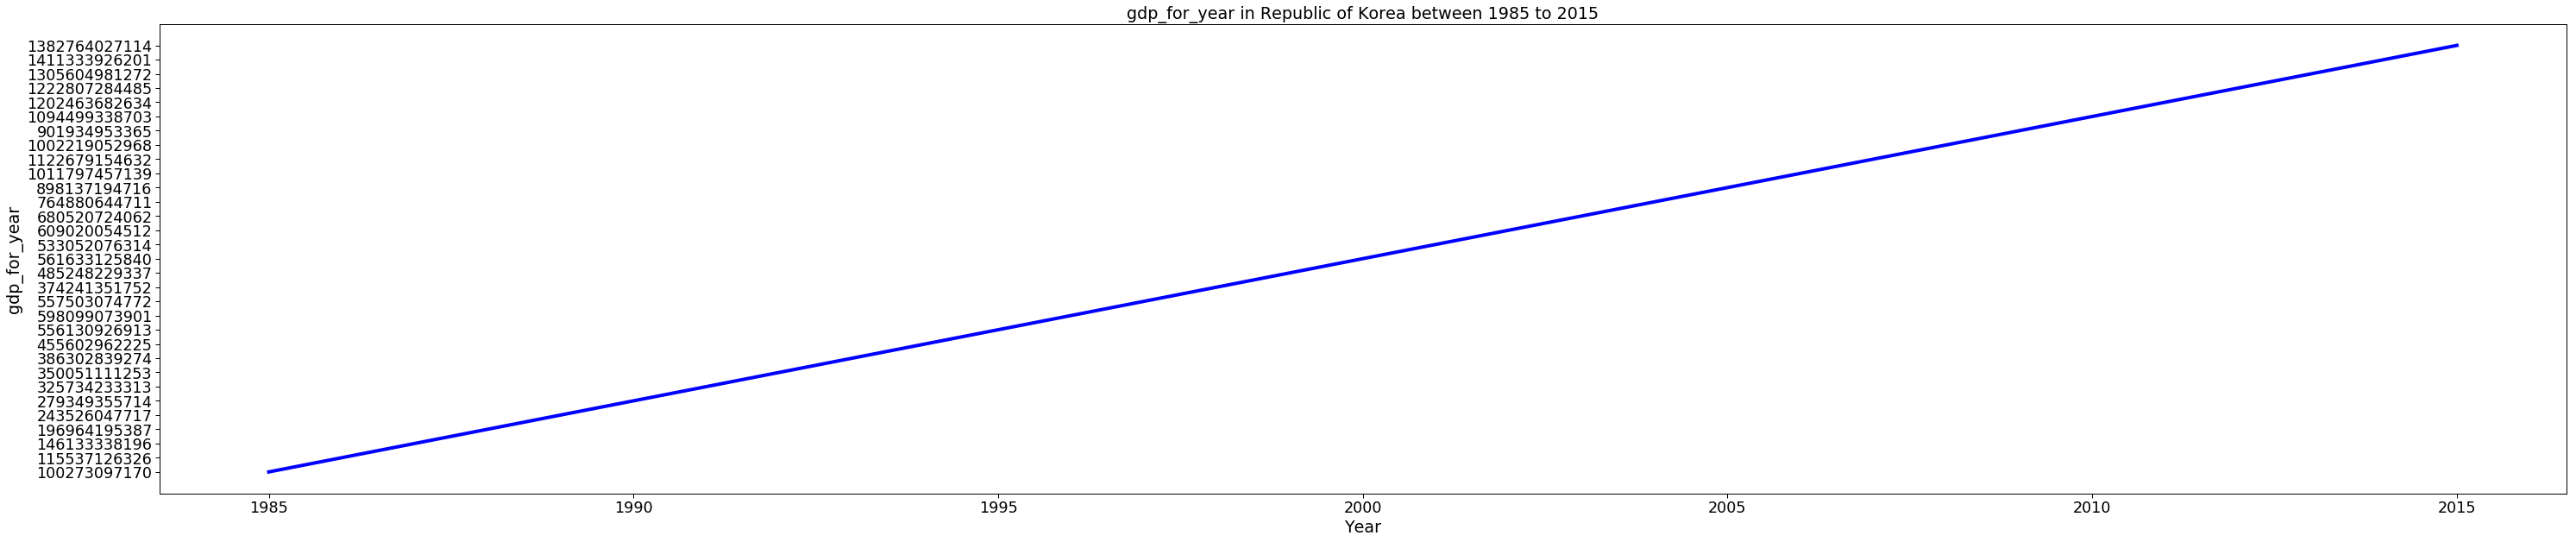

In [50]:

#study about gdpperyear Republic of Korea
plt.figure(figsize = (50,10))
plt.plot(uniqueyear, getfilteredData(masterdata,'Republic of Korea','male','5-14 years').gdp_for_year, color = "blue")
plt.title('gdp_for_year in Republic of Korea between 1985 to 2015')
plt.ylabel('gdp_for_year')
plt.xlabel('Year')
plt.savefig('gdp_for_year in Republic of Korea between 1985 to 2015.png')
plt.show()


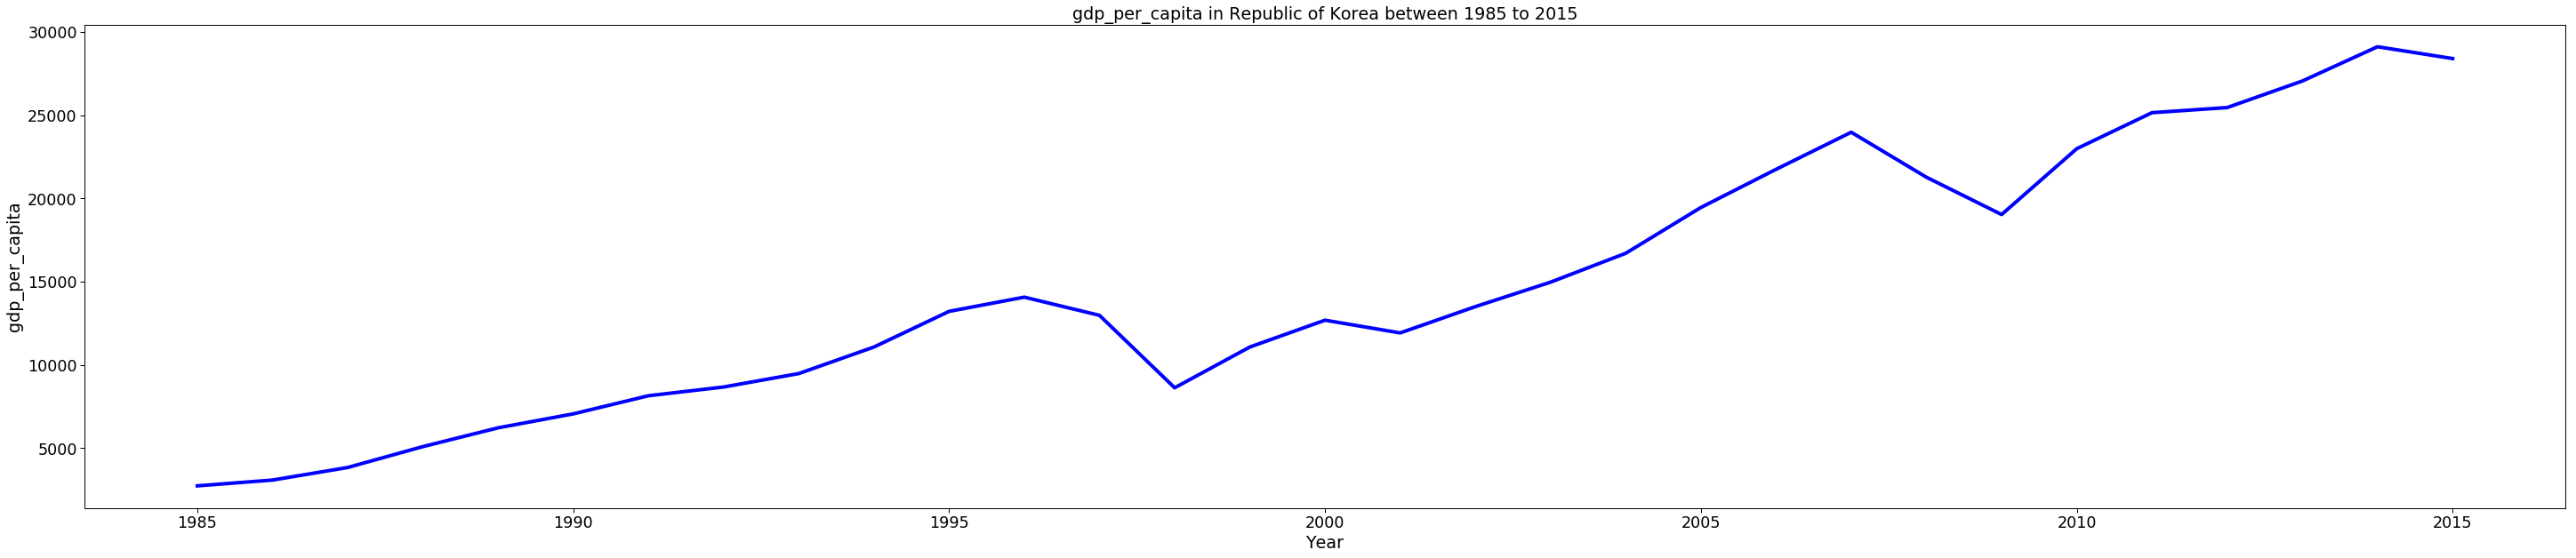

In [51]:

#study about gdpPerCapita Republic of Korea
plt.figure(figsize = (50,10))
plt.plot(uniqueyear, getfilteredData(masterdata,'Republic of Korea','male','5-14 years').gdp_per_capita, color = "blue")
plt.title('gdp_per_capita in Republic of Korea between 1985 to 2015')
plt.ylabel('gdp_per_capita')
plt.xlabel('Year')
plt.savefig('gdp_per_capita in Republic of Korea between 1985 to 2015.png')
plt.show()


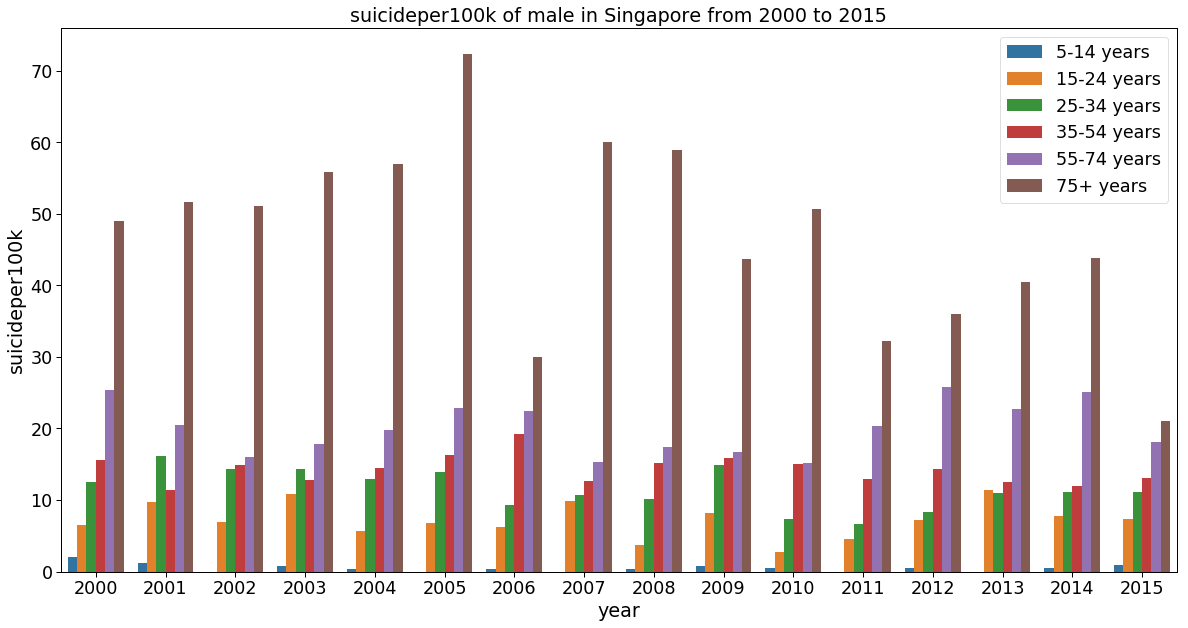

In [52]:

#study about singapore
#suicideper100k by singapore for 15 years for male
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='Singapore')& (masterdata.year>1999) & (masterdata.sex=='male')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of male in Singapore from 2000 to 2015')
plt.legend(loc = 'upper right')
plt.savefig('suicideper100k of male in Singapore from 2000 to 2015.png')
plt.show()

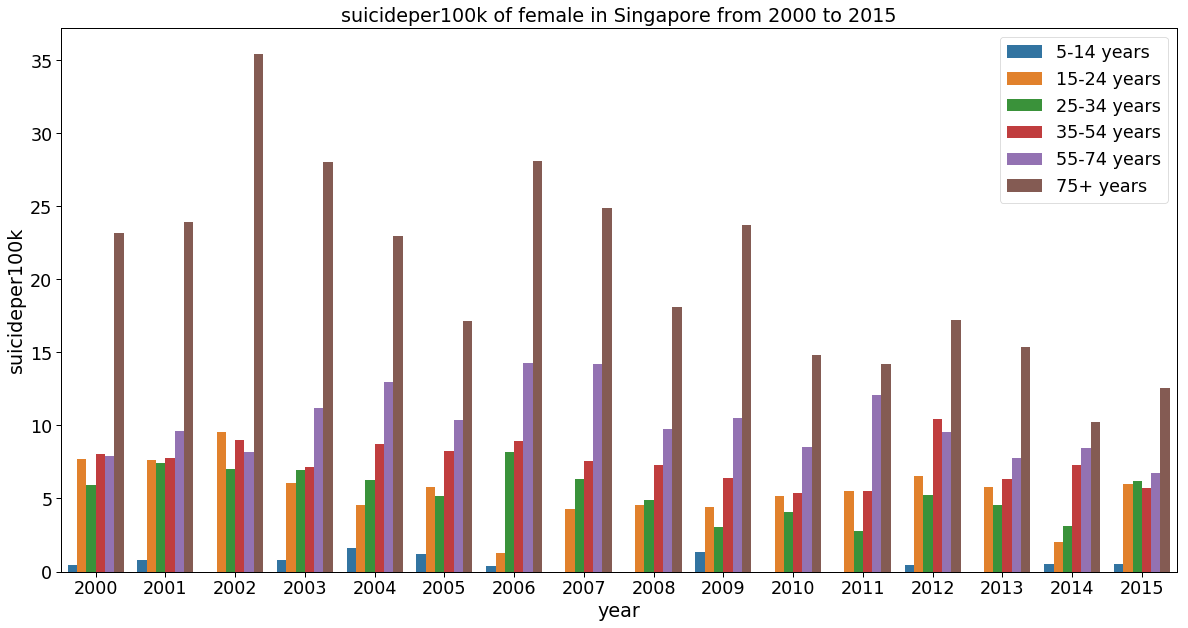

In [53]:

#suicideper100k by singapore for 15 years for female
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='Singapore')& (masterdata.year>1999) & (masterdata.sex=='female')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of female in Singapore from 2000 to 2015')
plt.savefig('suicideper100k of female in Singapore from 2000 to 2015.png')
plt.legend(loc = 'upper right')
plt.show()


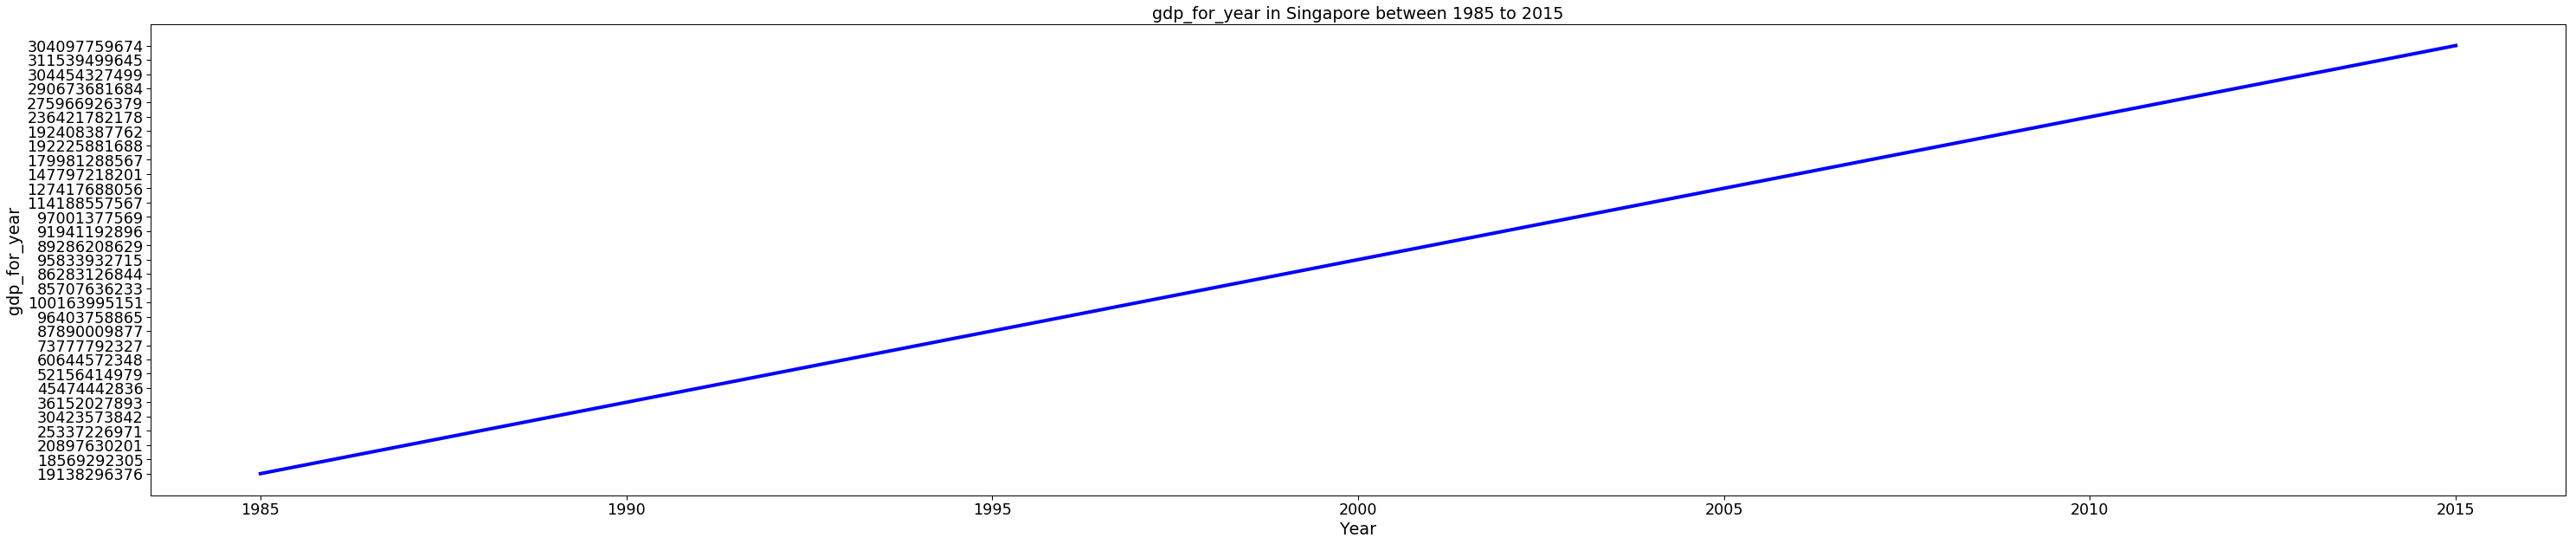

In [54]:

#study about gdp_per_year singapore
# Gdpfor year is sam for all gender and age group
plt.figure(figsize = (50,10))
plt.plot(uniqueyear, getfilteredData(masterdata,'Singapore','male','15-24 years').gdp_for_year, color = "blue")
plt.title('gdp_for_year in Singapore between 1985 to 2015')
plt.ylabel('gdp_for_year')
plt.xlabel('Year')
plt.savefig('gdp_for_year in Singapore between 1985 to 2015.png')
plt.show()

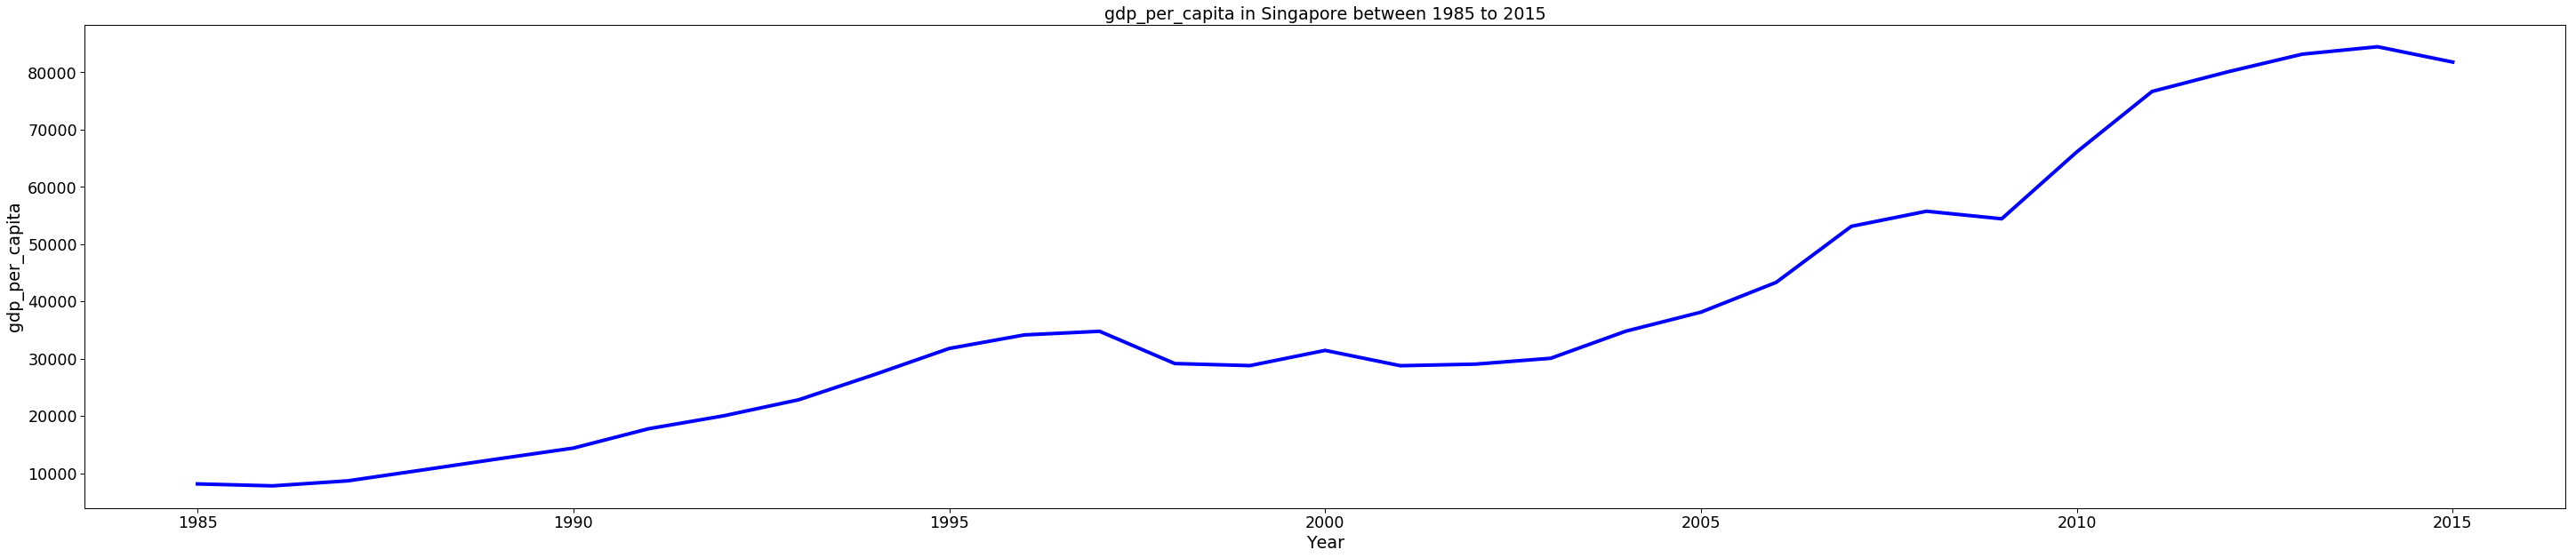

In [55]:
#study about gdp_per_capita singapore
plt.figure(figsize = (50,10))
plt.plot(uniqueyear, getfilteredData(masterdata,'Singapore','male','15-24 years').gdp_per_capita, color = "blue")
plt.title('gdp_per_capita in Singapore between 1985 to 2015')
plt.ylabel('gdp_per_capita')
plt.xlabel('Year')
plt.savefig('gdp_per_capita in Singapore between 1985 to 2015.png')
plt.show()

In [56]:

# Norway doesnot have data for 1985 do we will create new array for year
yearForNorway=uniqueyear[uniqueyear!=1985]
np.shape(uniqueyear)

(31,)

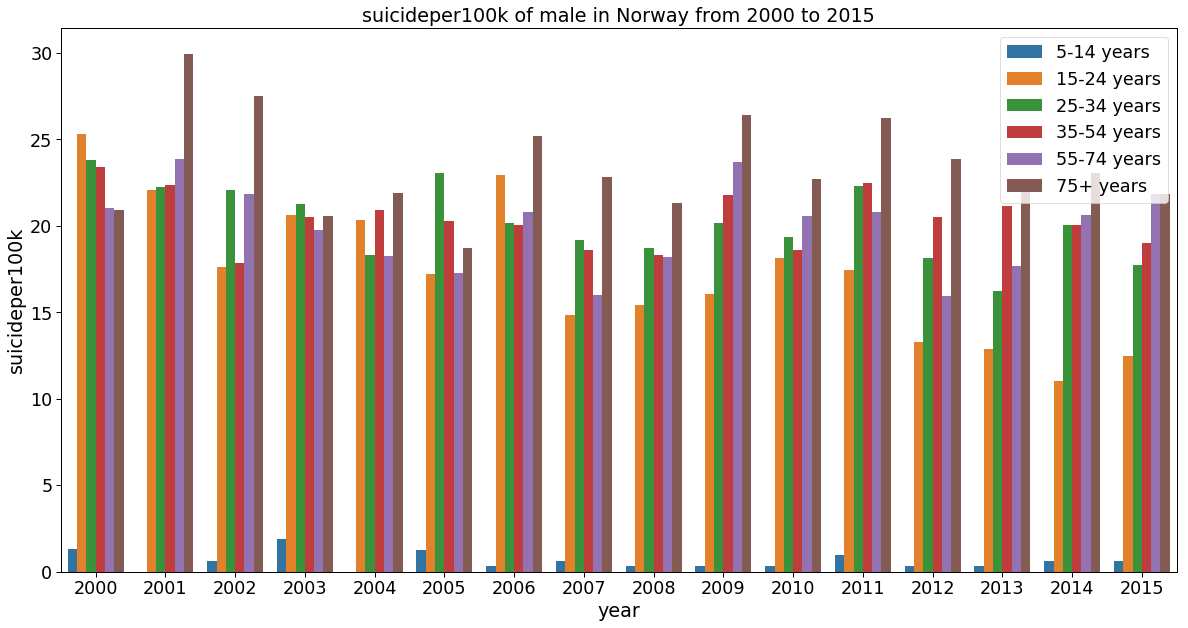

In [57]:
#study about Norway
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='Norway')& (masterdata.year>1999) & (masterdata.sex=='male')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of male in Norway from 2000 to 2015')
plt.legend(loc = 'upper right')
plt.savefig('suicideper100k of male in Norway from 2000 to 2015.png')
plt.show()


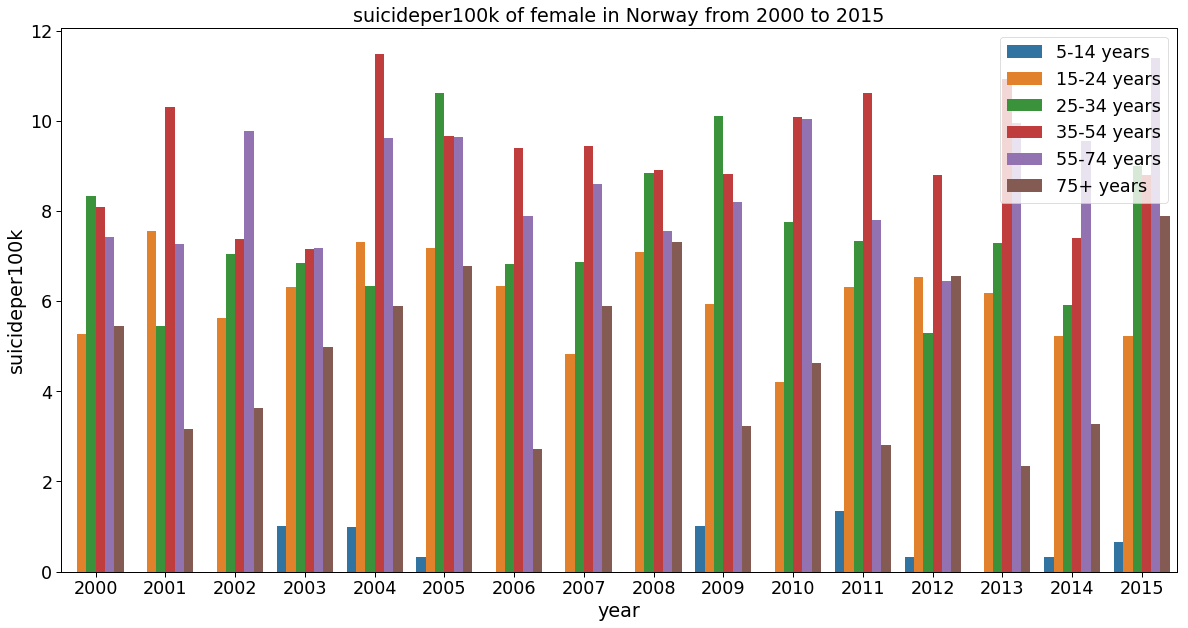

In [58]:
#suicideper100k by Norway for 15 years for female
plt.figure(figsize=(20,10))
sb.barplot(data=masterdata[(masterdata.country=='Norway')& (masterdata.year>1999) & (masterdata.sex=='female')],x='year',y='suicideper100k',hue='age',hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.title('suicideper100k of female in Norway from 2000 to 2015')
plt.savefig('suicideper100k of female in Norway from 2000 to 2015.png')
plt.legend(loc = 'upper right')
plt.show()


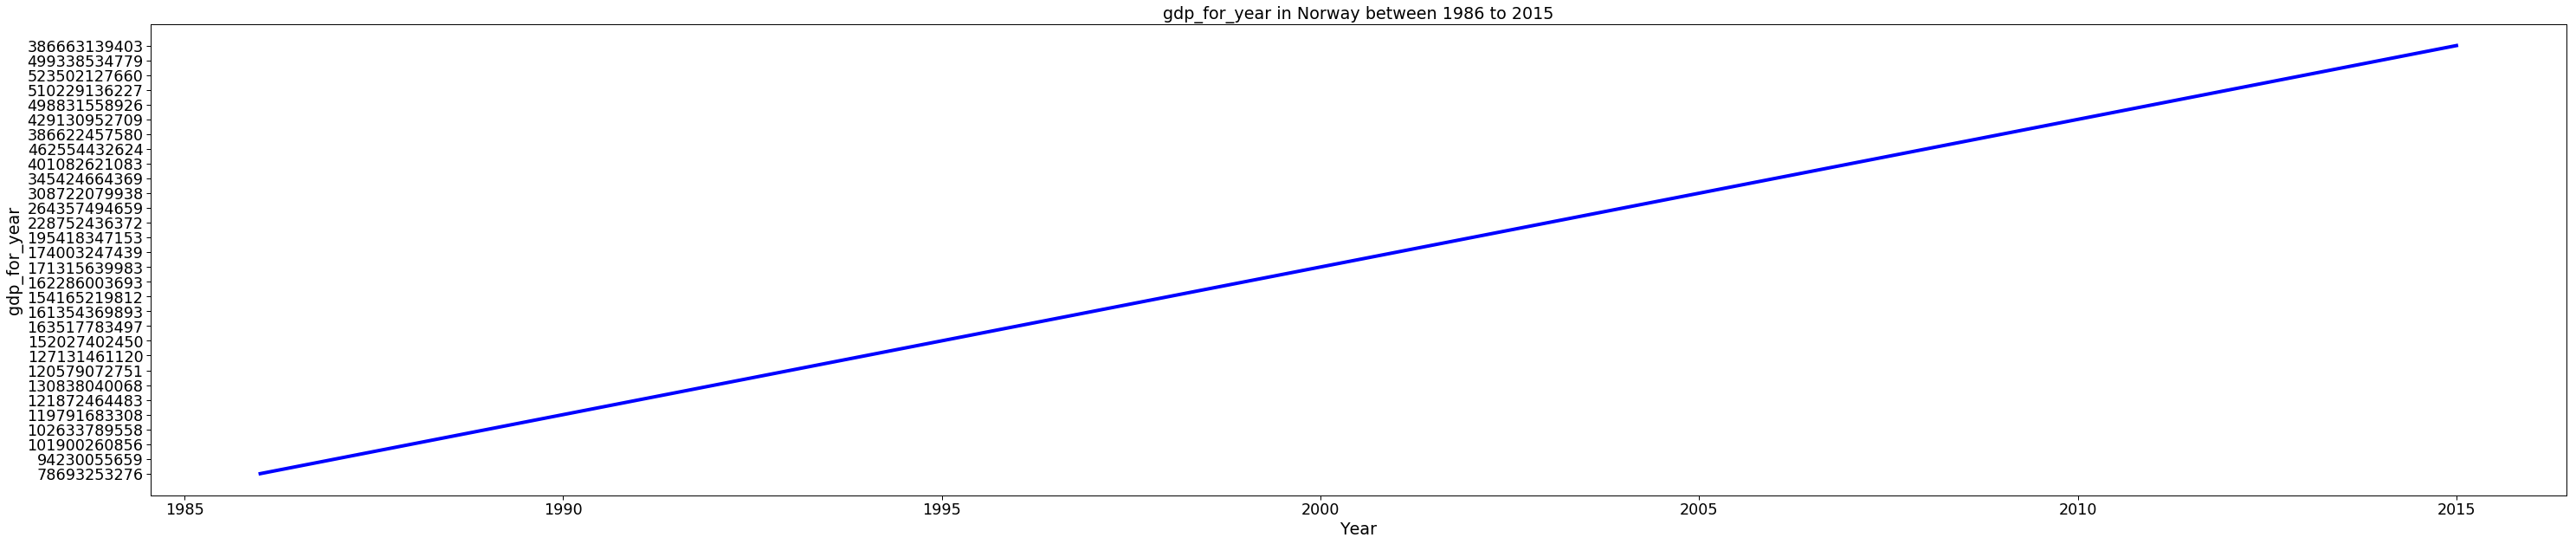

In [59]:
#study about gdp_per_year Norway
# Gdpfor year is same for all gender and age group
plt.figure(figsize = (50,10))
plt.plot(yearForNorway, getfilteredData(masterdata,'Norway','male','15-24 years').gdp_for_year, color = "blue")
plt.title('gdp_for_year in Norway between 1986 to 2015')
plt.ylabel('gdp_for_year')
plt.xlabel('Year')
plt.savefig('gdp_for_year in Norway between 1986 to 2015.png')
plt.show()

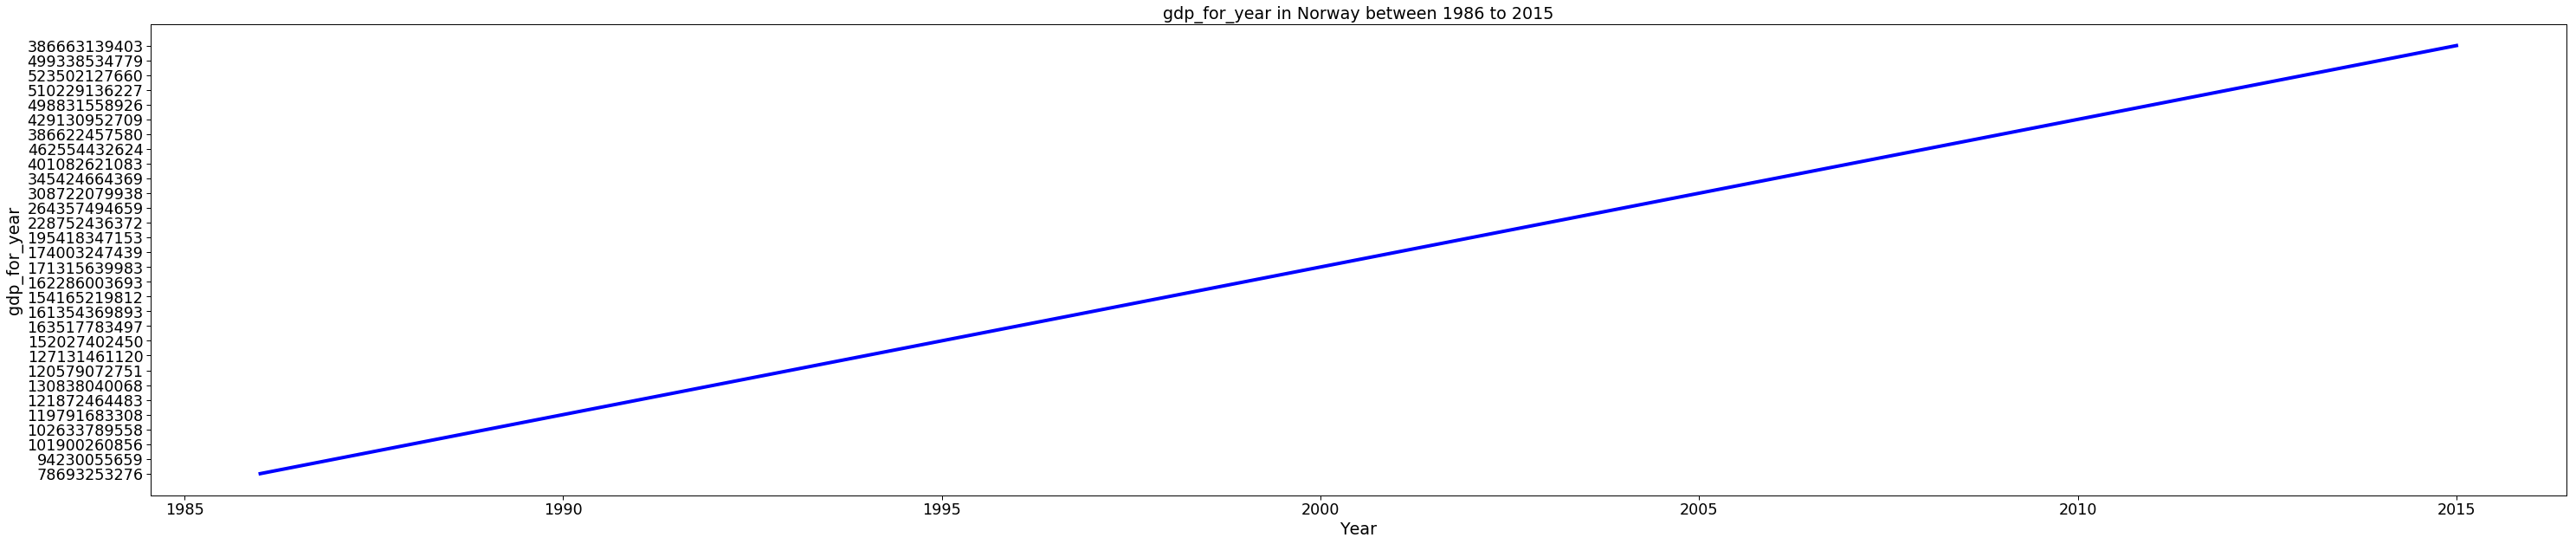

In [60]:
#study about gdp_per_year Norway
plt.figure(figsize = (50,10))
plt.plot(yearForNorway, getfilteredData(masterdata,'Norway','male','5-14 years').gdp_for_year, color = "blue")
plt.title('gdp_for_year in Norway between 1986 to 2015')
plt.ylabel('gdp_for_year')
plt.xlabel('Year')
plt.savefig('gdp_for_year in Norway between 1986 to 2015.png')
plt.show()

In [61]:
#printing correlation between the numerical column in dataset
print(masterdata.corr())

                    year  suicides_no  population  suicideper100k  \
year            1.000000    -0.000971    0.009746       -0.035764   
suicides_no    -0.000971     1.000000    0.617401        0.306382   
population      0.009746     0.617401    1.000000        0.008051   
suicideper100k -0.035764     0.306382    0.008051        1.000000   
gdp_per_capita  0.344529     0.063189    0.085510        0.003449   

                gdp_per_capita  
year                  0.344529  
suicides_no           0.063189  
population            0.085510  
suicideper100k        0.003449  
gdp_per_capita        1.000000  


In [62]:
#gdp_for_year in masterdata set has comma so it is not shown in correlation matrix
#dataframe data with numerical value column of master data set and gdpperyear after changing datatype
data=np.array([masterdata.year,masterdata.suicides_no,masterdata.population,masterdata.suicideper100k,masterdata.gdp_per_capita,gdpForYear])
data=data.T
my_df = pd.DataFrame(data=data, columns=['year','suicide_no','population','suicideper100k','gdpPercapita','gdpPeryear'])


AxesSubplot(0.125,0.125;0.62x0.755)


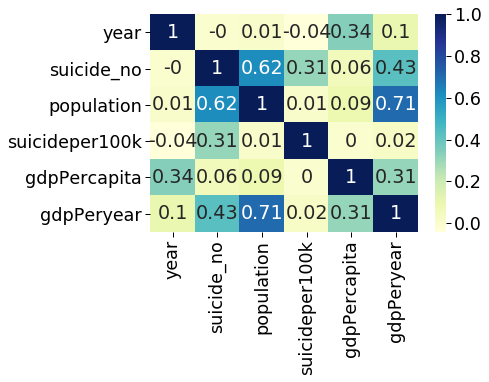

In [63]:
#correlation rounded up to 2 decimal places
print(sb.heatmap(round(my_df.corr(),2), annot=True, cmap='YlGnBu'))

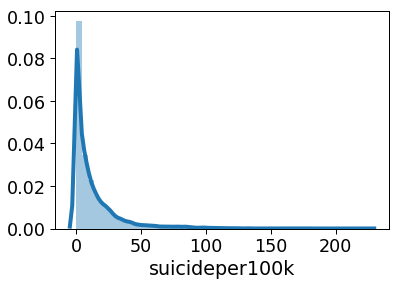

In [64]:
np.shape(masterdata)
#seeing the distribution of suicide per 100k
sb.distplot(masterdata.suicideper100k)

In [65]:
#creating array gend for gender where 0 means male and 1 means female
#method to set value = 0 if male and value =1 if female
def getgender(gen):
    sex=[]
    for i in gen:
        if(i=="male"):
            i=0
            sex.append(i)
        if(i=="female"):
            i=1
            sex.append(i)
    return sex
# for n variable we need n-1 dummy variable
gend= getgender(masterdata['sex'])
#creating dummy variable for age
agegroupDummy=pd.get_dummies(masterdata['age'])
#getdummies method created 6 dummies but 5 dumies only need for linear regression(to avoid dummy variable trap)
agegroupDummy=agegroupDummy.drop(['75+ years'], axis='columns')
masterdata=pd.concat([masterdata,agegroupDummy],axis=1)
masterdata.head(5)

,country,year,sex,age,suicides_no,population,suicideper100k,country_year,gdp_for_year,gdp_per_capita,generation,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X,1,0,0,0,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent,0,0,1,0,0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X,1,0,0,0,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation,0,0,0,0,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers,0,1,0,0,0


In [66]:
#creating dummy variable for generation
generationDummy=pd.get_dummies(masterdata['generation'])
generationDummy= generationDummy.drop(['Silent'], axis='columns')
masterdata=pd.concat([masterdata,generationDummy],axis=1)
masterdata.head(5)

,country,year,sex,age,suicides_no,population,suicideper100k,country_year,gdp_for_year,gdp_per_capita,...,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,Boomers,G.I. Generation,Generation X,Generation Z,Millenials
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,...,1,0,0,0,0,0,0,1,0,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,...,0,0,1,0,0,0,0,0,0,0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,...,1,0,0,0,0,0,0,1,0,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,...,0,0,0,0,0,0,1,0,0,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,...,0,1,0,0,0,1,0,0,0,0


In [67]:
#continent
#reading contient.csv file
continent= pd.read_csv("D:\PythonProject\sucide\continent.csv")
Asia=continent['Asia'].str.strip()
Africa=continent['Africa'].str.strip()
NAmerica=continent['N.America'].str.strip()
SAmerica=continent['S.America'].str.strip()
Oceania=continent['Oceania'].str.strip()
Europe=continent['Europe'].str.strip()

In [68]:
#creating world dictionary
world={'Asia':Asia,'Africa':Africa,'NAmerica':NAmerica,'SAmerica':SAmerica,'Oceania':Oceania,'Europe':Europe}

#creating columnfor continent and copying country value
masterdata['continent']=masterdata.country
con=pd.Series(masterdata['continent'].str.strip()) #.str.strip() method to remove whitespace
#con.str.lower()

#method to replace country with contient
for contient in world:
    for i in  world.get(contient):
        for index,coun in enumerate(con):
            if(i==coun):
                con[index]=contient

#setting continent value
masterdata['continent']=con

In [69]:
#create dummies for continent
contient_dummy= pd.get_dummies(masterdata['continent'])
contient_dummy=contient_dummy.drop(['Asia'],axis='columns')
#concate dummyvariable with masterdata
masterdata=pd.concat([masterdata,contient_dummy],axis=1)
masterdata.head(5)

,country,year,sex,age,suicides_no,population,suicideper100k,country_year,gdp_for_year,gdp_per_capita,...,South Africa,Suriname,Sweden,Switzerland,Thailand,Turkmenistan,Ukraine,United Kingdom,Uruguay,Uzbekistan
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# defining dummy variable
#age dummy
age5=masterdata['5-14 years']
age15=masterdata['15-24 years']
age25=masterdata['25-34 years']
age35=masterdata['35-54 years']
age55=masterdata['55-74 years']
#generation dummy
boomers=masterdata['Boomers']
GIgen=masterdata['G.I. Generation']
genX=masterdata['Generation X']
genZ=masterdata['Generation Z']
Millenials=masterdata['Millenials']

#agegenderdummy
age_gender5=age5*gend
age_gender15=age15*gend
age_gender25=age25*gend
age_gender35=age35*gend
age_gender55=age55*gend

#contientdummy
africa=masterdata['Africa']
europe=masterdata['Europe']
namerica=masterdata['NAmerica']
samerica=masterdata['SAmerica']
oceania=masterdata['Oceania']

In [71]:
##assigning latest value to variable from masterdataset
year= masterdata.year
country=masterdata.country
y=masterdata.suicideper100k
gdpForYear=(masterdata.gdp_for_year.astype(float))/100000    ## divide by 100k because of large data it was giving memory error while running regression
suicidenum=masterdata.suicides_no

#creating variable array with all independent variable that i will be using  in different model
variable=np.array([y,country,year,year,gend,age5,age15,age25,age35,age55,age_gender5,age_gender15,age_gender25,age_gender35,age_gender55,boomers,GIgen,genX,genZ,Millenials,population,gdpPerCapita,gdpForYear,suicidenum,africa,europe,namerica,samerica,oceania])
#variable.T is use for transpose. so that number of rows of variable y and independent variable is same.
variable=variable.T
np.shape(variable)

(27264, 29)

In [72]:
#creating dataframe of varible array
finaldata=pd.DataFrame(variable,columns=['y','country','year','years','gend','age5','age15','age25','age35','age55','age_gender5','age_gender15','age_gender25','age_gender35','age_gender55','boomers','GIgen','genX','genZ','Millenials','population','gdppercapita','gdpForYear','suicidenum','africa','europe','namerica','samerica','oceania'])
#setting index
finaldata.set_index(['country','year'], inplace=True)
#printing first 5 element
print(finaldata.head(5))

                 y years gend age5 age15 age25 age35 age55 age_gender5  \
country year                                                             
Albania 1987  6.71  1987    0    0     1     0     0     0           0   
        1987  5.19  1987    0    0     0     0     1     0           0   
        1987  4.83  1987    1    0     1     0     0     0           0   
        1987  4.59  1987    0    0     0     0     0     0           0   
        1987  3.28  1987    0    0     0     1     0     0           0   

             age_gender15  ... Millenials population gdppercapita gdpForYear  \
country year               ...                                                 
Albania 1987            0  ...          0     312900          796    21566.2   
        1987            0  ...          0     308000          796    21566.2   
        1987            1  ...          0     289700          796    21566.2   
        1987            0  ...          0      21800          796    21566.2   
 

In [73]:
#model1 with out interaction term using population and gdpForYear
exog_vars=['years','gend','age5','age15','age25','age35','age55','boomers','GIgen','genX','genZ','Millenials','population','gdpForYear','africa','europe','namerica','samerica','oceania']
exog = sm.add_constant(finaldata[exog_vars])
mod1 = PooledOLS(finaldata.y, exog).fit()
print(mod1)

C:\Users\srija\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                          PooledOLS Estimation Summary                          
Dep. Variable:                      y   R-squared:                        0.3207
Estimator:                  PooledOLS   R-squared (Between):              0.0714
No. Observations:               27264   R-squared (Within):               0.3802
Date:                Fri, Dec 18 2020   R-squared (Overall):              0.3207
Time:                        08:16:07   Log-likelihood                -1.138e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      676.93
Entities:                          90   P-value                           0.0000
Avg Obs:                       302.93   Distribution:                F(19,27244)
Min Obs:                       120.00                                           
Max Obs:                       372.00   F-statistic (robust):             676.93
                            

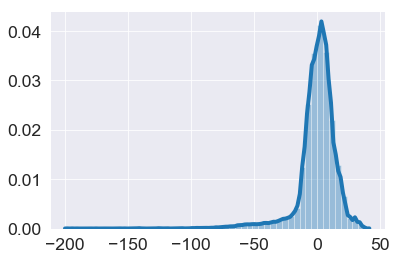

In [74]:
predictions=mod1.predict(exog)
#one empty row was in heading
finaldata.y.drop(finaldata.y.index[[1]])
residuals=predictions.predictions-finaldata.y
sb.set_style('darkgrid')
sb.distplot(residuals.tolist())

In [75]:
##measure error
print('Mean Absolute Error:', metrics.mean_absolute_error(finaldata.y, predictions.predictions))
print('Mean Squared Error:', metrics.mean_squared_error(finaldata.y, predictions.predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(finaldata.y, predictions.predictions)))

Mean Absolute Error: 10.042229039838933
Mean Squared Error: 246.6706747722171
Root Mean Squared Error: 15.705752919622068


In [76]:
#model without interactionterm using gdpPerCapita instead of gdpforyear and population
exog_vars=['years','gend','age5','age15','age25','age35','age55','boomers','GIgen','genX','genZ','Millenials','gdppercapita','africa','europe','namerica','samerica','oceania']
exog = sm.add_constant(finaldata[exog_vars])
mod2 = PooledOLS(finaldata.y, exog).fit()
print(mod2)

C:\Users\srija\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                          PooledOLS Estimation Summary                          
Dep. Variable:                      y   R-squared:                        0.3177
Estimator:                  PooledOLS   R-squared (Between):              0.0583
No. Observations:               27264   R-squared (Within):               0.3809
Date:                Fri, Dec 18 2020   R-squared (Overall):              0.3177
Time:                        08:16:08   Log-likelihood                -1.138e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      704.63
Entities:                          90   P-value                           0.0000
Avg Obs:                       302.93   Distribution:                F(18,27245)
Min Obs:                       120.00                                           
Max Obs:                       372.00   F-statistic (robust):             704.63
                            

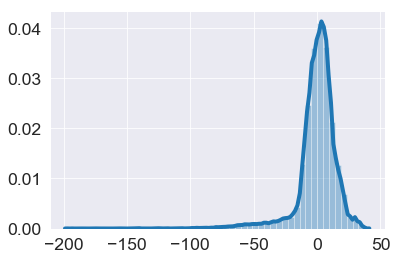

In [77]:
predictions=mod2.predict(exog)

#one empty row was in heading
finaldata.y.drop(finaldata.y.index[[1]])
residuals=predictions.predictions-finaldata.y
sb.set_style('darkgrid')
sb.distplot(residuals.tolist())

In [78]:

##measure error
print('Mean Absolute Error:', metrics.mean_absolute_error(finaldata.y, predictions.predictions))
print('Mean Squared Error:', metrics.mean_squared_error(finaldata.y, predictions.predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(finaldata.y, predictions.predictions)))

Mean Absolute Error: 10.032769017342247
Mean Squared Error: 247.77520124591803
Root Mean Squared Error: 15.74087676230006


In [79]:
##interaction term in model 1
exog_vars=['years','gend','age5','age15','age25','age35','age55','age_gender5','age_gender15','age_gender25','age_gender35','age_gender55','boomers','GIgen','genX','genZ','Millenials','population','gdpForYear','africa','europe','namerica','samerica','oceania']
exog = sm.add_constant(finaldata[exog_vars])
mod3 = PooledOLS(finaldata.y, exog).fit()
print(mod3)

C:\Users\srija\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                          PooledOLS Estimation Summary                          
Dep. Variable:                      y   R-squared:                        0.3728
Estimator:                  PooledOLS   R-squared (Between):              0.0719
No. Observations:               27264   R-squared (Within):               0.4465
Date:                Fri, Dec 18 2020   R-squared (Overall):              0.3728
Time:                        08:16:09   Log-likelihood                -1.127e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      674.56
Entities:                          90   P-value                           0.0000
Avg Obs:                       302.93   Distribution:                F(24,27239)
Min Obs:                       120.00                                           
Max Obs:                       372.00   F-statistic (robust):             674.56
                            

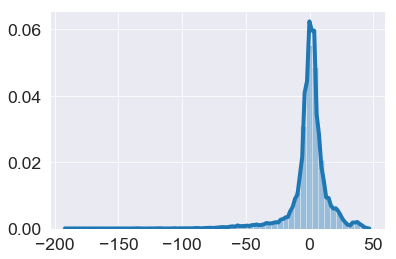

In [80]:
predictions=mod3.predict(exog)

#one empty row was in heading
finaldata.y.drop(finaldata.y.index[[1]])
residuals=predictions.predictions-finaldata.y
sb.set_style('darkgrid')
sb.distplot(residuals.tolist())

In [81]:
##measure error
print('Mean Absolute Error:', metrics.mean_absolute_error(finaldata.y, predictions.predictions))
print('Mean Squared Error:', metrics.mean_squared_error(finaldata.y, predictions.predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(finaldata.y, predictions.predictions)))


Mean Absolute Error: 8.912131865861348
Mean Squared Error: 227.75572311163853
Root Mean Squared Error: 15.091577886743272


In [82]:
##interaction in model2
exog_vars=['years','gend','age5','age15','age25','age35','age55','age_gender5','age_gender15','age_gender25','age_gender35','age_gender55','boomers','GIgen','genX','genZ','Millenials','gdppercapita','africa','europe','namerica','samerica','oceania']
exog = sm.add_constant(finaldata[exog_vars])
mod4 = PooledOLS(finaldata.y, exog).fit()
print(mod4)

C:\Users\srija\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                          PooledOLS Estimation Summary                          
Dep. Variable:                      y   R-squared:                        0.3691
Estimator:                  PooledOLS   R-squared (Between):              0.0584
No. Observations:               27264   R-squared (Within):               0.4467
Date:                Fri, Dec 18 2020   R-squared (Overall):              0.3691
Time:                        08:16:09   Log-likelihood                -1.128e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      693.03
Entities:                          90   P-value                           0.0000
Avg Obs:                       302.93   Distribution:                F(23,27240)
Min Obs:                       120.00                                           
Max Obs:                       372.00   F-statistic (robust):             693.03
                            

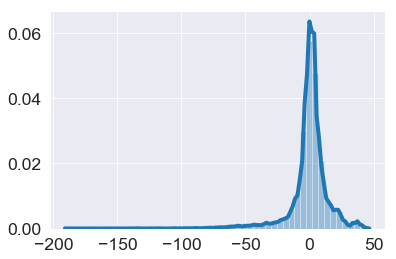

In [83]:
predictions=mod4.predict(exog)
#one empty row was in heading
finaldata.y.drop(finaldata.y.index[[1]])
residuals=predictions.predictions-finaldata.y
sb.set_style('darkgrid')
sb.distplot(residuals.tolist())

In [84]:
##measure error
print('Mean Absolute Error:', metrics.mean_absolute_error(finaldata.y, predictions.predictions))
print('Mean Squared Error:', metrics.mean_squared_error(finaldata.y, predictions.predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(finaldata.y, predictions.predictions)))

Mean Absolute Error: 8.887534169559757
Mean Squared Error: 229.0758625101012
Root Mean Squared Error: 15.135252310751255


In [85]:
###using suicide number , gdpForYear and population
exog_vars=['years','gend','age5','age15','age25','age35','age55','age_gender5','age_gender15','age_gender25','age_gender35','age_gender55','boomers','GIgen','genX','genZ','Millenials','suicidenum','gdpForYear','population','africa','europe','namerica','samerica','oceania']
exog = sm.add_constant(finaldata[exog_vars])
mod5 = PooledOLS(finaldata.y, exog).fit()
print(mod5)

C:\Users\srija\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                          PooledOLS Estimation Summary                          
Dep. Variable:                      y   R-squared:                        0.4341
Estimator:                  PooledOLS   R-squared (Between):              0.2478
No. Observations:               27264   R-squared (Within):               0.4724
Date:                Fri, Dec 18 2020   R-squared (Overall):              0.4341
Time:                        08:16:10   Log-likelihood                -1.113e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      835.63
Entities:                          90   P-value                           0.0000
Avg Obs:                       302.93   Distribution:                F(25,27238)
Min Obs:                       120.00                                           
Max Obs:                       372.00   F-statistic (robust):             835.63
                            

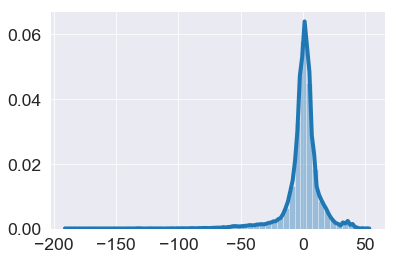

In [86]:
predictions=mod5.predict(exog)

#one empty row was in heading
finaldata.y.drop(finaldata.y.index[[1]])
residuals=predictions.predictions-finaldata.y
sb.set_style('darkgrid')
sb.distplot(residuals.tolist())


In [87]:
##measure error
print('Mean Absolute Error:', metrics.mean_absolute_error(finaldata.y, predictions.predictions))
print('Mean Squared Error:', metrics.mean_squared_error(finaldata.y, predictions.predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(finaldata.y, predictions.predictions)))


Mean Absolute Error: 8.499698168264096
Mean Squared Error: 205.5055080701753
Root Mean Squared Error: 14.335463301553085


In [88]:
#printing estimates and t stats of all the model.
#compare method is used for panelmodel only
print(compare({'Md1':mod1,'Md2':mod2,'Md3':mod3,'Md4':mod4,'Md5':mod5}))

                                   Model Comparison                                   
                               Md1          Md2          Md3          Md4          Md5
--------------------------------------------------------------------------------------
Dep. Variable                    y            y            y            y            y
Estimator                PooledOLS    PooledOLS    PooledOLS    PooledOLS    PooledOLS
No. Observations             27264        27264        27264        27264        27264
Cov. Est.               Unadjusted   Unadjusted   Unadjusted   Unadjusted   Unadjusted
R-squared                   0.3207       0.3177       0.3728       0.3691       0.4341
R-Squared (Within)          0.3802       0.3809       0.4465       0.4467       0.4724
R-Squared (Between)         0.0714       0.0583       0.0719       0.0584       0.2478
R-Squared (Overall)         0.3207       0.3177       0.3728       0.3691       0.4341
F-statistic                 676.93       70